# Table of Contents
1. [Average Case](#average-case)
2. [Best Case](#best-case)
3. [Worst Case](#worst-case)

# UAN From 3/1/2012 - 3/31/2016 (UAN 2 months in future)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/UANDAP.csv")
mar12on = data[['Date', 'Dollar','Crude','Corn','Gas','UAN']]
mar12on = mar12on.dropna()
mar12onnew = np.array(mar12on)
mar12onnew = pd.DataFrame(mar12onnew)
mar12onnew.columns = ['Date','Dollar','Crude','Corn','Gas','UAN']
mar12onnew.head()

,Date,Dollar,Crude,Corn,Gas,UAN
0,10/15/2010,77.041,81.93,575,2.149,260
1,10/18/2010,76.934,83.8,569.25,2.138,260
2,10/19/2010,78.184,80.16,558,2.089,260
3,10/20/2010,77.171,82.54,585.5,2.155,263
4,10/21/2010,77.418,81.33,575.75,2.133,263


In [63]:
#Convert to proper date form
from datetime import datetime
mar12onnew['Date'] = pd.to_datetime(mar12onnew['Date'])
date = mar12onnew['Date']
mar12onnew.dtypes

Date      datetime64[ns]
Dollar            object
Crude             object
Corn              object
Gas               object
UAN               object
dtype: object

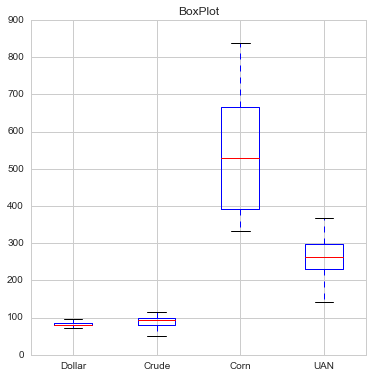

In [12]:
plt.show(mar12on[['Dollar','Crude','Corn','UAN']].plot(kind='box',figsize=(6,6),title=('BoxPlot'))) #had to put gas separately, I also looked at all others and no apparent outliers

In [13]:
mar12on.describe()

,Dollar,Crude,Corn,Gas,UAN
count,1366.000000,1366.000000,1366.000000,1366.000000,1366.000000
mean,83.717452,84.376047,542.345351,3.116513,262.268668
std,7.341952,21.878395,142.880596,0.804300,48.583842
min,72.933000,28.350000,333.500000,1.767000,142.000000
25%,79.447500,79.785000,393.062500,2.479000,230.000000
50%,80.784000,92.990000,529.125000,2.822500,264.000000
75%,85.894750,99.427500,667.000000,3.817500,298.000000
max,100.330000,114.430000,838.750000,5.465000,368.000000


In [14]:
mar12on.corr()

,Dollar,Crude,Corn,Gas,UAN
Dollar,1.000000,-0.909105,-0.704364,-0.204395,-0.759250
Crude,-0.909105,1.000000,0.566441,0.383809,0.605785
Corn,-0.704364,0.566441,1.000000,-0.164523,0.805295
Gas,-0.204395,0.383809,-0.164523,1.000000,-0.001633
UAN,-0.759250,0.605785,0.805295,-0.001633,1.000000


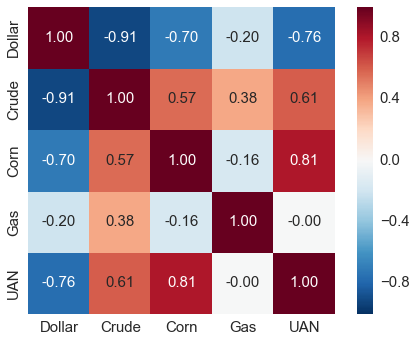

In [15]:
#dollar and crude highly correlated so will have to get rid of one when using mlr
cols= ['Dollar','Crude','Corn','Gas','UAN']
cm = np.corrcoef(mar12on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#corn and dollar most correlated to UAN so could get rid of crude most likely

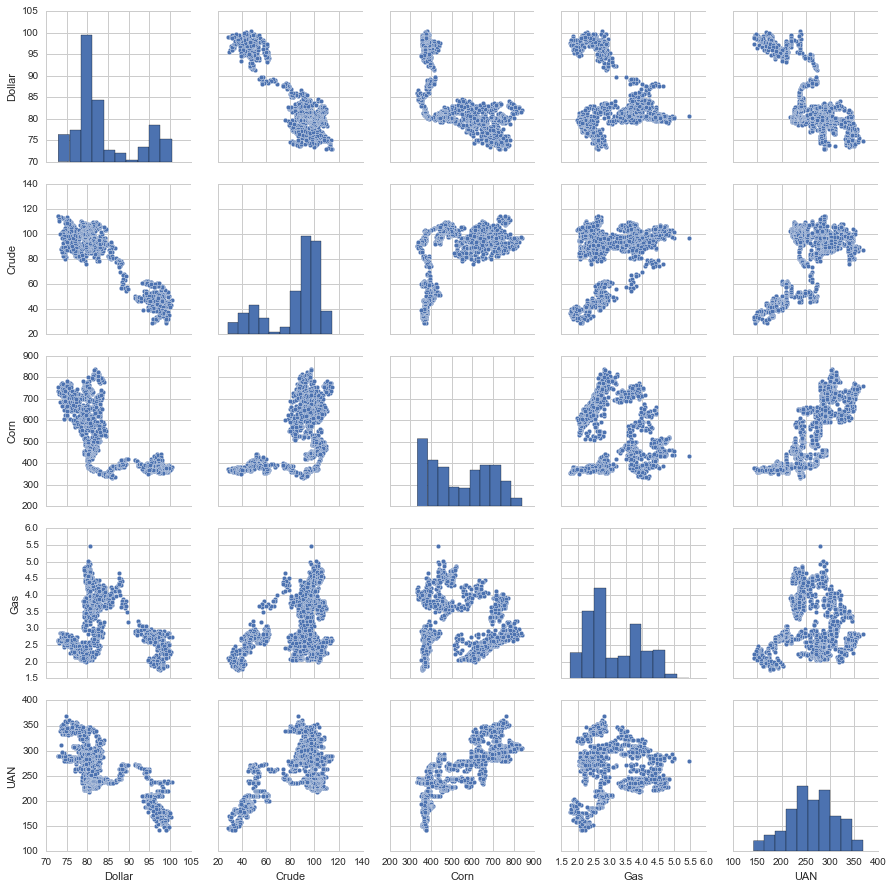

In [16]:
#maybe later take out outlier 1/29/2014
sns.set(style='whitegrid', context='notebook')
sns.pairplot(mar12on, size=2.5);
plt.show() #apparent bimodal distributions, probably be less bimodal if had more data from 1996 
           #like when predicting urea, however doesn't look like two normal distributions (look at kurtosis later)

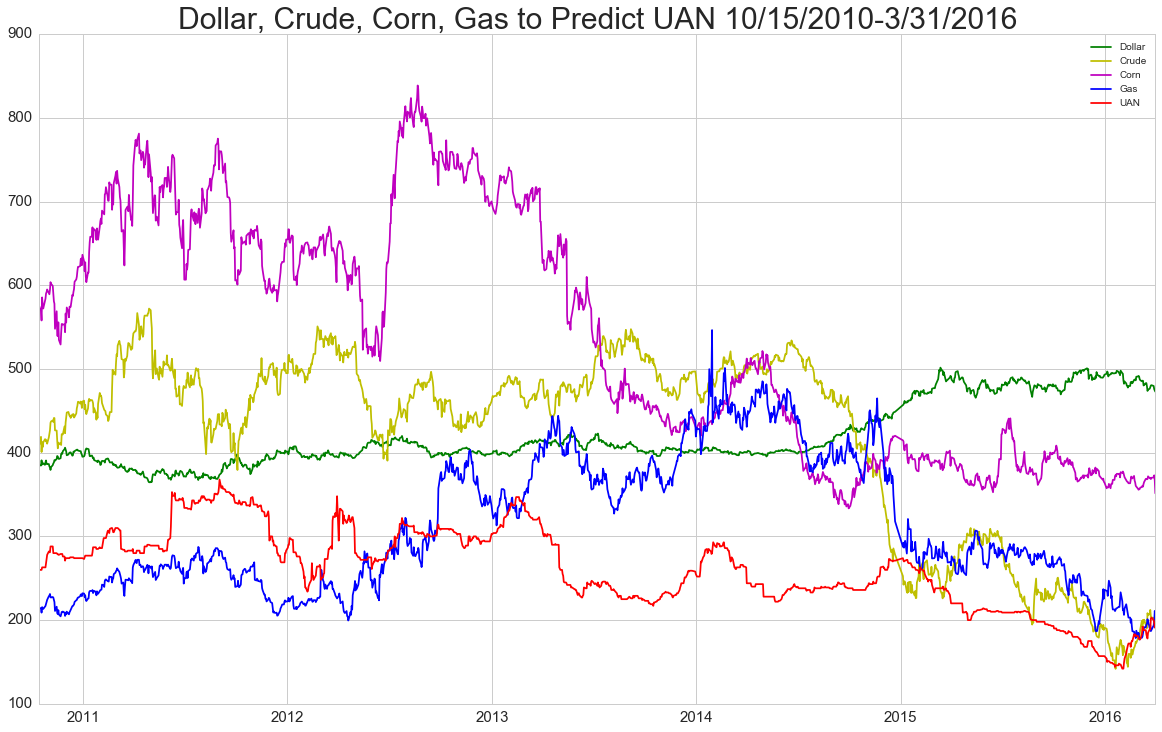

In [19]:
x = date
y1 = (mar12on['Dollar'])*5
y2 = (mar12on['Crude'])*5
y3 = (mar12on['Corn'])
y4 = (mar12on['Gas'])*100
y5 = (mar12on['UAN'])
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'m')
ax.plot(x,y4,'b')
ax.plot(x,y5,'r')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas to Predict UAN 10/15/2010-3/31/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

### Look at different MLR's Since Different X variables are highly correlated to each other

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = mar12on[['Dollar','Crude','Corn','Gas']]
Y = mar12on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     959.1
Date:                Mon, 25 Apr 2016   Prob (F-statistic):               0.00
Time:                        08:36:23   Log-Likelihood:                -6327.2
No. Observations:                1366   AIC:                         1.266e+04
Df Residuals:                    1361   BIC:                         1.269e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        593.8424     29.969     19.815      0.000       535.052   652.632
Dollar        -4.5351      0.267    -17.004      0.000        -5.058    -4.012
Crude         -0.7806      0.085     -9.219      0.000        -0.947    -0.614
Corn           0.1819      0.007     24.510      0.000         0.167     0.196
Gas            4.9062      1.059      4.633      0.000         2.829     6.984
==============================================================================
Omnibus:                       63.849   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.013
Skew:                           0.146   Prob(JB):                     3.04e-07
Kurtosis:                       2.335   Cond. No.                     2.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


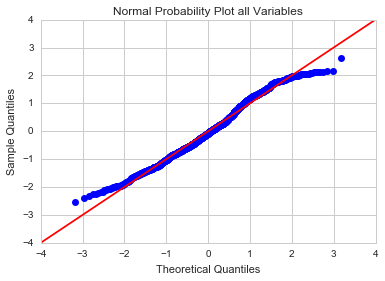

In [21]:
from scipy import stats
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot all Variables')
fig.show() #not too badly skewed

In [22]:
#fit a OLS model with dollar, corn, gas see how R^2 changes
X = mar12on[['Dollar','Corn','Gas']]
Y = mar12on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1178.
Date:                Mon, 25 Apr 2016   Prob (F-statistic):               0.00
Time:                        08:36:31   Log-Likelihood:                -6368.5
No. Observations:                1366   AIC:                         1.275e+04
Df Residuals:                    1362   BIC:                         1.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        366.9225     17.617     20.828      0.000       332.364   401.481
Dollar        -2.4738      0.150    -16.511      0.000        -2.768    -2.180
Corn           0.1849      0.008     24.203      0.000         0.170     0.200
Gas            0.6906      0.984      0.702      0.483        -1.240     2.621
==============================================================================
Omnibus:                       84.607   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.131
Skew:                           0.248   Prob(JB):                     7.10e-10
Kurtosis:                       2.297   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


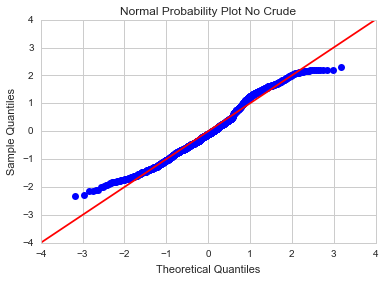

In [23]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot No Crude')
fig.show() #slightly more skewed when got rid of crude

In [24]:
#fit a OLS model with crude, corn, gas see how R^2 changes
X = mar12on[['Crude','Corn','Gas']]
Y = mar12on[['UAN']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #so R^2 less, AIC and BIC higher than other

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UAN   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     976.0
Date:                Mon, 25 Apr 2016   Prob (F-statistic):               0.00
Time:                        08:36:59   Log-Likelihood:                -6458.7
No. Observations:                1366   AIC:                         1.293e+04
Df Residuals:                    1362   BIC:                         1.295e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         89.0179      4.498     19.790      0.000        80.194    97.842
Crude          0.4263      0.051      8.390      0.000         0.327     0.526
Corn           0.2391      0.007     32.830      0.000         0.225     0.253
Gas            2.4394      1.155      2.113      0.035         0.174     4.705
==============================================================================
Omnibus:                       74.951   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.689
Skew:                           0.329   Prob(JB):                     4.41e-11
Kurtosis:                       2.364   Cond. No.                     3.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


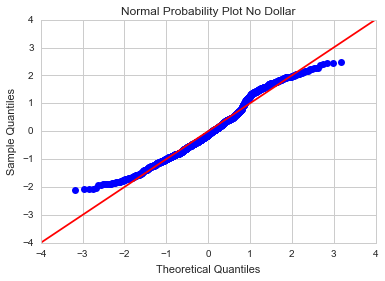

In [25]:
res = est.resid
fig = sm.graphics.qqplot(res, dist=stats.t, line='45', fit=True)
plt.title('Normal Probability Plot No Dollar')
fig.show() #pretty much same skew as when I didn't include crude

### RDF models

In [64]:
#initially need to say what X and y are and the train/test split 
#for the definition in the next cell to find best parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12onnew[['Dollar','Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [65]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on uan data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [66]:
#do multiple times to see what parameters are the best
rdf_model_UANall = fit_predict_model(X_train,y_train)
print (rdf_model_UANall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [68]:
X = mar12onnew[['Dollar','Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#corn most important, followed by dollar and crude about same, gas least important

MSE train: 27.565, test: 149.443
R^2 train: 0.989, test: 0.934
[ 0.16720438  0.10955932  0.64509468  0.07814163]


In [69]:
#comparing the different models
uan_predicted = forest.predict(X)
uan_predicted = pd.DataFrame(uan_predicted)
mar12onnew['Predicted_UAN_RDF'] = uan_predicted
rdf_error = (abs(mar12onnew['Predicted_UAN_RDF'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['RDF_Error'] = rdf_error
#all variables included
mlr_predicted = 593.8424 - (mar12onnew['Dollar']*4.5351) - (mar12onnew['Crude']*0.7806) + (mar12onnew['Corn']*0.1819) + (mar12onnew['Gas']*4.9062)  
mar12onnew['Predicted_UAN_MLR'] = mlr_predicted
mlr_error = (abs(mar12onnew['Predicted_UAN_MLR'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['MLR_Error'] = mlr_error
#mlr model without crude
mlr_predicted_nocrude = 366.9225 - (mar12onnew['Dollar']*2.4738) + (mar12onnew['Corn']*0.1849) + (mar12onnew['Gas']*0.6906)  
mar12onnew['Predicted_UAN_MLR_NoCrude'] = mlr_predicted_nocrude
mlr_error_nocrude = (abs(mar12onnew['Predicted_UAN_MLR_NoCrude'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['MLR_Error_NoCrude'] = mlr_error_nocrude
#mlr model without dollar
mlr_predicted_nodollar = 89.0179 + (mar12onnew['Crude']*0.4263) + (mar12onnew['Corn']*0.2391) + (mar12onnew['Gas']*2.4394)  
mar12onnew['Predicted_UAN_MLR_No$'] = mlr_predicted_nodollar
mlr_error_nodollar = (abs(mar12onnew['Predicted_UAN_MLR_No$'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['MLR_Error_No$'] = mlr_error_nodollar

print("Average RDF error is: %.3f" % (rdf_error.mean()))  
print("Average MLR error is: %.3f" % (mlr_error.mean()))
print("Average MLR error no crude is: %.3f" % (mlr_error_nocrude.mean()))
print("Average MLR error no dollar is: %.3f" % (mlr_error_nodollar.mean()))
mar12onnew
#so MLR models I would just use, dollar, corn, gas since crude doesn't make model any better

Average RDF error is: 1.798
Average MLR error is: 8.179
Average MLR error no crude is: 8.280
Average MLR error no dollar is: 8.797


,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_RDF,RDF_Error,Predicted_UAN_MLR,MLR_Error,Predicted_UAN_MLR_NoCrude,MLR_Error_NoCrude,Predicted_UAN_MLR_No$,MLR_Error_No$
0,2010-10-15,77.041,81.93,575,2.149,260,261.737883,0.668417,295.635,13.7058,284.14,9.28464,266.669,2.56517
1,2010-10-18,76.934,83.8,569.25,2.138,260,263.675026,1.41347,293.561,12.908,283.334,8.97461,266.065,2.33267
2,2010-10-19,78.184,80.16,558,2.089,260,265.953023,2.28962,288.446,10.941,278.128,6.97222,261.704,0.655313
3,2010-10-20,77.171,82.54,585.5,2.155,263,267.208473,1.60018,296.509,12.741,285.764,8.65554,269.455,2.45424
4,2010-10-21,77.418,81.33,575.75,2.133,263,264.062327,0.403926,294.452,11.9588,283.335,7.73197,266.554,1.35131
5,2010-10-22,77.472,82.45,572.25,2.133,263,265.718586,1.03368,292.696,11.2912,282.554,7.43511,266.195,1.21466
6,2010-10-25,77.103,83.21,581.5,2.161,263,264.271855,0.483595,295.596,12.3939,285.197,8.43986,268.799,2.20476
7,2010-10-26,77.708,83.2,584,2.169,263,268.133239,1.9518,293.354,11.5415,284.168,8.04865,269.412,2.43784
8,2010-10-27,78.149,82.67,590.25,2.193,268,282.131872,5.27309,293.022,9.33673,284.249,6.06314,270.739,1.02183
9,2010-10-28,77.308,82.94,592,2.22,274,276.577630,0.940741,297.076,8.42208,286.672,4.62478,271.338,0.971573


#### Now going to use RDF top 3 features, RDF no crude, RDF no dollar

In [70]:
#no gas
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12onnew[['Dollar','Crude','Corn']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
rdf_model_UANnoGas = fit_predict_model(X_train,y_train)
print (rdf_model_UANnoGas.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [71]:
#no gas rdf
X = mar12onnew[['Dollar','Crude','Corn']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#corn most important and crude least

MSE train: 45.976, test: 238.271
R^2 train: 0.981, test: 0.895
[ 0.20262438  0.13099287  0.66638274]


In [72]:
#adding no gas rdf to table
uan_predicted2 = forest.predict(X)
uan_predicted2 = pd.DataFrame(uan_predicted2)
mar12onnew['Predicted_UANnoGas_RDF'] = uan_predicted2
rdf_error_nogas = (abs(mar12onnew['Predicted_UANnoGas_RDF'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['RDF_noGas_Error'] = rdf_error_nogas
print("Average RDF no gas error is: %.3f" % (rdf_error_nogas.mean()))
mar12onnew

Average RDF no gas error is: 2.350


,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_RDF,RDF_Error,Predicted_UAN_MLR,MLR_Error,Predicted_UAN_MLR_NoCrude,MLR_Error_NoCrude,Predicted_UAN_MLR_No$,MLR_Error_No$,Predicted_UANnoGas_RDF,RDF_noGas_Error
0,2010-10-15,77.041,81.93,575,2.149,260,261.737883,0.668417,295.635,13.7058,284.14,9.28464,266.669,2.56517,261.650389,0.634765
1,2010-10-18,76.934,83.8,569.25,2.138,260,263.675026,1.41347,293.561,12.908,283.334,8.97461,266.065,2.33267,263.507054,1.34887
2,2010-10-19,78.184,80.16,558,2.089,260,265.953023,2.28962,288.446,10.941,278.128,6.97222,261.704,0.655313,267.618696,2.93027
3,2010-10-20,77.171,82.54,585.5,2.155,263,267.208473,1.60018,296.509,12.741,285.764,8.65554,269.455,2.45424,265.978175,1.13239
4,2010-10-21,77.418,81.33,575.75,2.133,263,264.062327,0.403926,294.452,11.9588,283.335,7.73197,266.554,1.35131,263.282089,0.107258
5,2010-10-22,77.472,82.45,572.25,2.133,263,265.718586,1.03368,292.696,11.2912,282.554,7.43511,266.195,1.21466,265.432665,0.924968
6,2010-10-25,77.103,83.21,581.5,2.161,263,264.271855,0.483595,295.596,12.3939,285.197,8.43986,268.799,2.20476,265.100441,0.798647
7,2010-10-26,77.708,83.2,584,2.169,263,268.133239,1.9518,293.354,11.5415,284.168,8.04865,269.412,2.43784,268.745322,2.18453
8,2010-10-27,78.149,82.67,590.25,2.193,268,282.131872,5.27309,293.022,9.33673,284.249,6.06314,270.739,1.02183,286.037332,6.73035
9,2010-10-28,77.308,82.94,592,2.22,274,276.577630,0.940741,297.076,8.42208,286.672,4.62478,271.338,0.971573,276.346275,0.856305


In [73]:
#no crude
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12onnew[['Dollar','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
rdf_model_UANnoCrude = fit_predict_model(X_train,y_train)
print (rdf_model_UANnoCrude.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [74]:
#no crude
X = mar12onnew[['Dollar','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#corn most important and gas least

MSE train: 43.093, test: 164.294
R^2 train: 0.982, test: 0.927
[ 0.21620744  0.67118553  0.11260702]


In [75]:
#adding no crude rdf to table
uan_predicted3 = forest.predict(X)
uan_predicted3 = pd.DataFrame(uan_predicted3)
mar12onnew['Predicted_UANnoCrude_RDF'] = uan_predicted3
rdf_error_nocrude = (abs(mar12onnew['Predicted_UANnoCrude_RDF'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['RDF_noCrude_Error'] = rdf_error_nocrude
print("Average RDF no crude error is: %.3f" % (rdf_error_nocrude.mean()))
mar12onnew

Average RDF no crude error is: 2.135


,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_RDF,RDF_Error,Predicted_UAN_MLR,MLR_Error,Predicted_UAN_MLR_NoCrude,MLR_Error_NoCrude,Predicted_UAN_MLR_No$,MLR_Error_No$,Predicted_UANnoGas_RDF,RDF_noGas_Error,Predicted_UANnoCrude_RDF,RDF_noCrude_Error
0,2010-10-15,77.041,81.93,575,2.149,260,261.737883,0.668417,295.635,13.7058,284.14,9.28464,266.669,2.56517,261.650389,0.634765,261.584939,0.609592
1,2010-10-18,76.934,83.8,569.25,2.138,260,263.675026,1.41347,293.561,12.908,283.334,8.97461,266.065,2.33267,263.507054,1.34887,261.167796,0.449152
2,2010-10-19,78.184,80.16,558,2.089,260,265.953023,2.28962,288.446,10.941,278.128,6.97222,261.704,0.655313,267.618696,2.93027,268.245086,3.17119
3,2010-10-20,77.171,82.54,585.5,2.155,263,267.208473,1.60018,296.509,12.741,285.764,8.65554,269.455,2.45424,265.978175,1.13239,265.016159,0.7666
4,2010-10-21,77.418,81.33,575.75,2.133,263,264.062327,0.403926,294.452,11.9588,283.335,7.73197,266.554,1.35131,263.282089,0.107258,264.273510,0.484224
5,2010-10-22,77.472,82.45,572.25,2.133,263,265.718586,1.03368,292.696,11.2912,282.554,7.43511,266.195,1.21466,265.432665,0.924968,264.372082,0.521704
6,2010-10-25,77.103,83.21,581.5,2.161,263,264.271855,0.483595,295.596,12.3939,285.197,8.43986,268.799,2.20476,265.100441,0.798647,263.143143,0.0544269
7,2010-10-26,77.708,83.2,584,2.169,263,268.133239,1.9518,293.354,11.5415,284.168,8.04865,269.412,2.43784,268.745322,2.18453,267.236398,1.6108
8,2010-10-27,78.149,82.67,590.25,2.193,268,282.131872,5.27309,293.022,9.33673,284.249,6.06314,270.739,1.02183,286.037332,6.73035,291.102977,8.62051
9,2010-10-28,77.308,82.94,592,2.22,274,276.577630,0.940741,297.076,8.42208,286.672,4.62478,271.338,0.971573,276.346275,0.856305,277.467992,1.26569


In [76]:
#no dollar
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = mar12onnew[['Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [45]:
rdf_model_UANnoDollar = fit_predict_model(X_train,y_train)
print (rdf_model_UANnoDollar.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [77]:
#no dollar
X = mar12onnew[['Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
#corn most important and gas least

MSE train: 38.689, test: 201.241
R^2 train: 0.984, test: 0.911
[ 0.22302444  0.66743362  0.10954194]


In [78]:
#adding no dollar rdf to table
uan_predicted4 = forest.predict(X)
uan_predicted4 = pd.DataFrame(uan_predicted4)
mar12onnew['Predicted_UANno$_RDF'] = uan_predicted4
rdf_error_nodollar = (abs(mar12onnew['Predicted_UANno$_RDF'] - mar12onnew['UAN'])/mar12onnew['UAN'])*100
mar12onnew['RDF_no$_Error'] = rdf_error_nodollar
print("Average RDF no dollar error is: %.3f" % (rdf_error_nocrude.mean()))
mar12onnew

Average RDF no dollar error is: 2.135


,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_RDF,RDF_Error,Predicted_UAN_MLR,MLR_Error,Predicted_UAN_MLR_NoCrude,MLR_Error_NoCrude,Predicted_UAN_MLR_No$,MLR_Error_No$,Predicted_UANnoGas_RDF,RDF_noGas_Error,Predicted_UANnoCrude_RDF,RDF_noCrude_Error,Predicted_UANno$_RDF,RDF_no$_Error
0,2010-10-15,77.041,81.93,575,2.149,260,261.737883,0.668417,295.635,13.7058,284.14,9.28464,266.669,2.56517,261.650389,0.634765,261.584939,0.609592,261.603979,0.616915
1,2010-10-18,76.934,83.8,569.25,2.138,260,263.675026,1.41347,293.561,12.908,283.334,8.97461,266.065,2.33267,263.507054,1.34887,261.167796,0.449152,265.352934,2.05882
2,2010-10-19,78.184,80.16,558,2.089,260,265.953023,2.28962,288.446,10.941,278.128,6.97222,261.704,0.655313,267.618696,2.93027,268.245086,3.17119,266.360666,2.44641
3,2010-10-20,77.171,82.54,585.5,2.155,263,267.208473,1.60018,296.509,12.741,285.764,8.65554,269.455,2.45424,265.978175,1.13239,265.016159,0.7666,268.334272,2.02824
4,2010-10-21,77.418,81.33,575.75,2.133,263,264.062327,0.403926,294.452,11.9588,283.335,7.73197,266.554,1.35131,263.282089,0.107258,264.273510,0.484224,263.138264,0.052572
5,2010-10-22,77.472,82.45,572.25,2.133,263,265.718586,1.03368,292.696,11.2912,282.554,7.43511,266.195,1.21466,265.432665,0.924968,264.372082,0.521704,264.630599,0.62
6,2010-10-25,77.103,83.21,581.5,2.161,263,264.271855,0.483595,295.596,12.3939,285.197,8.43986,268.799,2.20476,265.100441,0.798647,263.143143,0.0544269,268.477434,2.08267
7,2010-10-26,77.708,83.2,584,2.169,263,268.133239,1.9518,293.354,11.5415,284.168,8.04865,269.412,2.43784,268.745322,2.18453,267.236398,1.6108,267.005255,1.52291
8,2010-10-27,78.149,82.67,590.25,2.193,268,282.131872,5.27309,293.022,9.33673,284.249,6.06314,270.739,1.02183,286.037332,6.73035,291.102977,8.62051,277.937719,3.7081
9,2010-10-28,77.308,82.94,592,2.22,274,276.577630,0.940741,297.076,8.42208,286.672,4.62478,271.338,0.971573,276.346275,0.856305,277.467992,1.26569,275.912045,0.697827


In [79]:
#Convert to proper date form
from datetime import datetime
mar12onnew['Date'] = pd.to_datetime(mar12onnew['Date'])
date = mar12onnew['Date']
mar12onnew.dtypes

Date                         datetime64[ns]
Dollar                               object
Crude                                object
Corn                                 object
Gas                                  object
UAN                                  object
Predicted_UAN_RDF                   float64
RDF_Error                            object
Predicted_UAN_MLR                    object
MLR_Error                            object
Predicted_UAN_MLR_NoCrude            object
MLR_Error_NoCrude                    object
Predicted_UAN_MLR_No$                object
MLR_Error_No$                        object
Predicted_UANnoGas_RDF              float64
RDF_noGas_Error                      object
Predicted_UANnoCrude_RDF            float64
RDF_noCrude_Error                    object
Predicted_UANno$_RDF                float64
RDF_no$_Error                        object
dtype: object

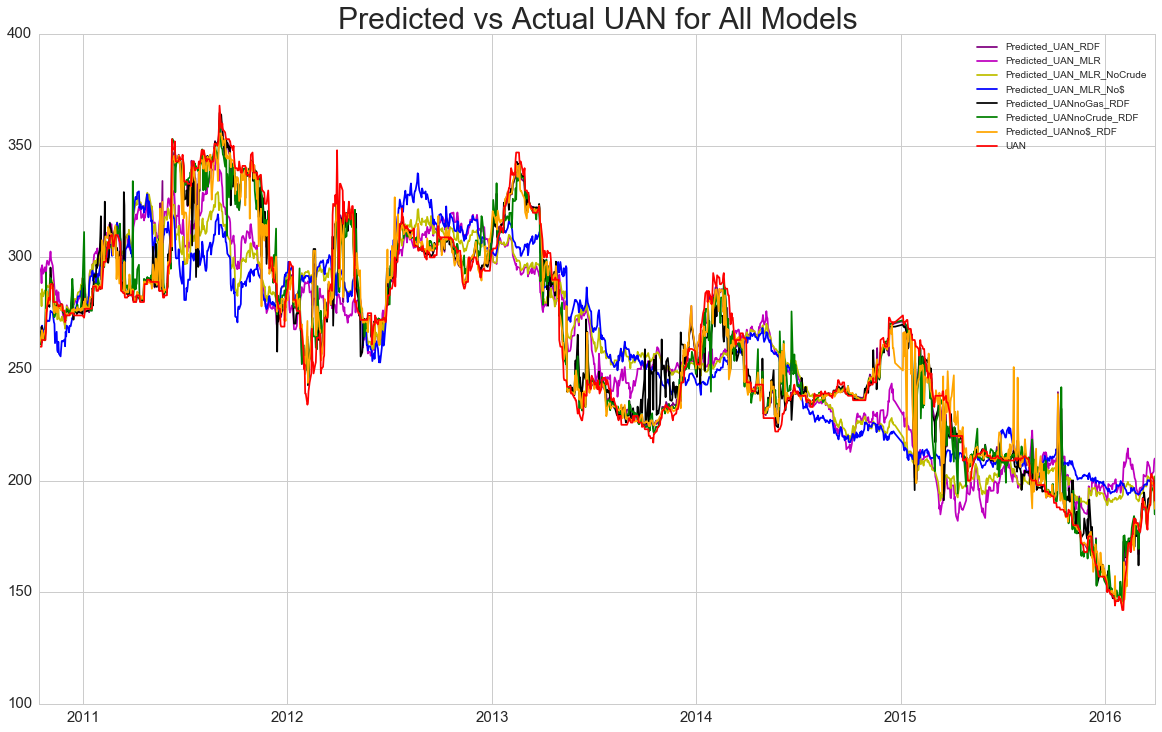

In [58]:
x = (mar12onnew['Date'])
y1 = (mar12onnew['Predicted_UAN_RDF'])
y2 = (mar12onnew['Predicted_UAN_MLR'])
y3 = (mar12onnew['Predicted_UAN_MLR_NoCrude'])
y4 = (mar12onnew['Predicted_UAN_MLR_No$'])
y5 = (mar12onnew['Predicted_UANnoGas_RDF'])
y6 = (mar12onnew['Predicted_UANnoCrude_RDF'])
y7 = (mar12onnew['Predicted_UANno$_RDF'])
y8 = (mar12onnew['UAN'])
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'purple')
ax.plot(x,y2,'m')
ax.plot(x,y3,'y')
ax.plot(x,y4,'b')
ax.plot(x,y5,'k')
ax.plot(x,y6,'g')
ax.plot(x,y7,'orange')
ax.plot(x,y8,'r')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Predicted vs Actual UAN for All Models', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
plt.show()
#sort out which models you are interested in by '#'

## Average Case
[Top](#table-of-contents)

In [61]:
#predictions part
data2 = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdateavg2.csv")
newpred = data2[['Date','Dollar','Crude','Corn','Gas']][1062:]
newpred2 = data2[['Dollar','Crude','Corn','Gas']][1062:]
newpred3 = data2[['Dollar','Crude','Corn']][1062:]
newpred4 = data2[['Dollar','Corn','Gas']][1062:]
newpred5 = data2[['Crude','Corn','Gas']][1062:]                                                

In [81]:
#new predictions starting with rdf all
X = mar12onnew[['Dollar','Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','Gas']
newpred_predicted = forest.predict(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred['Predicted_UAN_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 26.559, test: 148.649
R^2 train: 0.989, test: 0.934
[ 0.18384475  0.0908941   0.64320452  0.08205663]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF
0,2016-04-01,96.2914,39.55,372.991,2.05454,191.781479
1,2016-04-02,96.3182,39.52,372.974,2.05509,191.764336
2,2016-04-03,96.345,39.49,372.957,2.05563,191.787193
3,2016-04-04,96.3717,39.46,372.94,2.05618,191.621479
4,2016-04-05,96.3985,39.43,372.922,2.05672,190.381479
5,2016-04-06,96.4252,39.4,372.905,2.05727,190.135765
6,2016-04-07,96.452,39.37,372.888,2.05781,190.123297
7,2016-04-08,96.4788,39.34,372.871,2.05836,190.094726
8,2016-04-09,96.5055,39.31,372.854,2.0589,189.709011
9,2016-04-10,96.5323,39.28,372.836,2.05945,189.023297


In [82]:
#rdf no gas
X = mar12onnew[['Dollar','Crude','Corn']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred = pd.DataFrame(newpred_predicted2)
newpred['Predicted_UANnoGas_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 44.639, test: 239.122
R^2 train: 0.981, test: 0.894
[ 0.20695003  0.12735998  0.66569   ]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF
0,2016-04-01,96.2914,39.55,372.991,2.05454,191.781479,199.527865
1,2016-04-02,96.3182,39.52,372.974,2.05509,191.764336,199.727673
2,2016-04-03,96.345,39.49,372.957,2.05563,191.787193,199.838831
3,2016-04-04,96.3717,39.46,372.94,2.05618,191.621479,199.840295
4,2016-04-05,96.3985,39.43,372.922,2.05672,190.381479,199.867851
5,2016-04-06,96.4252,39.4,372.905,2.05727,190.135765,199.699851
6,2016-04-07,96.452,39.37,372.888,2.05781,190.123297,199.848188
7,2016-04-08,96.4788,39.34,372.871,2.05836,190.094726,198.872194
8,2016-04-09,96.5055,39.31,372.854,2.0589,189.709011,190.318204
9,2016-04-10,96.5323,39.28,372.836,2.05945,189.023297,190.114648


In [84]:
#rdf no crude
X = mar12onnew[['Dollar','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred = pd.DataFrame(newpred_predicted3)
newpred['Predicted_UANnoCrude_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 43.891, test: 164.068
R^2 train: 0.982, test: 0.927
[ 0.21510432  0.67027902  0.11461666]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF
0,2016-04-01,96.2914,39.55,372.991,2.05454,191.781479,199.527865,181.248598
1,2016-04-02,96.3182,39.52,372.974,2.05509,191.764336,199.727673,180.265741
2,2016-04-03,96.345,39.49,372.957,2.05563,191.787193,199.838831,179.505741
3,2016-04-04,96.3717,39.46,372.94,2.05618,191.621479,199.840295,173.995870
4,2016-04-05,96.3985,39.43,372.922,2.05672,190.381479,199.867851,173.961584
5,2016-04-06,96.4252,39.4,372.905,2.05727,190.135765,199.699851,173.904441
6,2016-04-07,96.452,39.37,372.888,2.05781,190.123297,199.848188,173.544441
7,2016-04-08,96.4788,39.34,372.871,2.05836,190.094726,198.872194,173.544441
8,2016-04-09,96.5055,39.31,372.854,2.0589,189.709011,190.318204,173.544441
9,2016-04-10,96.5323,39.28,372.836,2.05945,189.023297,190.114648,173.458727


In [85]:
#rdf no dollar
X = mar12onnew[['Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted4 = forest.predict(newpred5)
df_new_pred = pd.DataFrame(newpred_predicted4)
newpred['Predicted_UANnoCrude_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 40.596, test: 198.613
R^2 train: 0.983, test: 0.912
[ 0.22474533  0.66706622  0.10818845]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF
0,2016-04-01,96.2914,39.55,372.991,2.05454,191.781479,199.527865,188.598321
1,2016-04-02,96.3182,39.52,372.974,2.05509,191.764336,199.727673,188.546892
2,2016-04-03,96.345,39.49,372.957,2.05563,191.787193,199.838831,188.558321
3,2016-04-04,96.3717,39.46,372.94,2.05618,191.621479,199.840295,188.541178
4,2016-04-05,96.3985,39.43,372.922,2.05672,190.381479,199.867851,188.421178
5,2016-04-06,96.4252,39.4,372.905,2.05727,190.135765,199.699851,188.095464
6,2016-04-07,96.452,39.37,372.888,2.05781,190.123297,199.848188,187.444035
7,2016-04-08,96.4788,39.34,372.871,2.05836,190.094726,198.872194,186.638321
8,2016-04-09,96.5055,39.31,372.854,2.0589,189.709011,190.318204,181.746892
9,2016-04-10,96.5323,39.28,372.836,2.05945,189.023297,190.114648,181.358321


In [86]:
#adding mlr models
mlr_predicted = 593.8424 - (newpred['Dollar']*4.5351) - (newpred['Crude']*0.7806) + (newpred['Corn']*0.1819) + (newpred['Gas']*4.9062)  
newpred['Predicted_UAN_MLR'] = mlr_predicted

mlr_predicted_nocrude = 366.9225 - (newpred['Dollar']*2.4738) + (newpred['Corn']*0.1849) + (newpred['Gas']*0.6906)  
newpred['Predicted_UAN_MLR_NoCrude'] = mlr_predicted_nocrude

mlr_predicted_nodollar = 89.0179 + (newpred['Crude']*0.4263) + (newpred['Corn']*0.2391) + (newpred['Gas']*2.4394)  
newpred['Predicted_UAN_MLR_No$'] = mlr_predicted_nodollar

newpred

,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$
0,2016-04-01,96.2914,39.55,372.991,2.05454,191.781479,199.527865,188.598321,204.206,199.102,200.072
1,2016-04-02,96.3182,39.52,372.974,2.05509,191.764336,199.727673,188.546892,204.107,199.033,200.057
2,2016-04-03,96.345,39.49,372.957,2.05563,191.787193,199.838831,188.558321,204.009,198.964,200.041
3,2016-04-04,96.3717,39.46,372.94,2.05618,191.621479,199.840295,188.541178,203.91,198.895,200.025
4,2016-04-05,96.3985,39.43,372.922,2.05672,190.381479,199.867851,188.421178,203.812,198.826,200.01
5,2016-04-06,96.4252,39.4,372.905,2.05727,190.135765,199.699851,188.095464,203.714,198.757,199.994
6,2016-04-07,96.452,39.37,372.888,2.05781,190.123297,199.848188,187.444035,203.615,198.688,199.979
7,2016-04-08,96.4788,39.34,372.871,2.05836,190.094726,198.872194,186.638321,203.517,198.619,199.963
8,2016-04-09,96.5055,39.31,372.854,2.0589,189.709011,190.318204,181.746892,203.418,198.55,199.948
9,2016-04-10,96.5323,39.28,372.836,2.05945,189.023297,190.114648,181.358321,203.32,198.481,199.932


In [240]:
frames = [mar12onnew,newpred]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Dollar,Gas,MLR_Error,MLR_Error_No$,MLR_Error_NoCrude,Predicted_UAN_MLR,Predicted_UAN_MLR_No$,Predicted_UAN_MLR_NoCrude,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF,RDF_Error,RDF_no$_Error,RDF_noCrude_Error,RDF_noGas_Error,UAN
0,575,81.93,2010-10-15,77.041,2.149,13.7058,2.56517,9.28464,295.635,266.669,284.14,261.737883,261.603979,261.584939,261.650389,0.668417,0.616915,0.609592,0.634765,260
1,569.25,83.8,2010-10-18,76.934,2.138,12.908,2.33267,8.97461,293.561,266.065,283.334,263.675026,265.352934,261.167796,263.507054,1.41347,2.05882,0.449152,1.34887,260
2,558,80.16,2010-10-19,78.184,2.089,10.941,0.655313,6.97222,288.446,261.704,278.128,265.953023,266.360666,268.245086,267.618696,2.28962,2.44641,3.17119,2.93027,260
3,585.5,82.54,2010-10-20,77.171,2.155,12.741,2.45424,8.65554,296.509,269.455,285.764,267.208473,268.334272,265.016159,265.978175,1.60018,2.02824,0.7666,1.13239,263
4,575.75,81.33,2010-10-21,77.418,2.133,11.9588,1.35131,7.73197,294.452,266.554,283.335,264.062327,263.138264,264.273510,263.282089,0.403926,0.052572,0.484224,0.107258,263
5,572.25,82.45,2010-10-22,77.472,2.133,11.2912,1.21466,7.43511,292.696,266.195,282.554,265.718586,264.630599,264.372082,265.432665,1.03368,0.62,0.521704,0.924968,263
6,581.5,83.21,2010-10-25,77.103,2.161,12.3939,2.20476,8.43986,295.596,268.799,285.197,264.271855,268.477434,263.143143,265.100441,0.483595,2.08267,0.0544269,0.798647,263
7,584,83.2,2010-10-26,77.708,2.169,11.5415,2.43784,8.04865,293.354,269.412,284.168,268.133239,267.005255,267.236398,268.745322,1.9518,1.52291,1.6108,2.18453,263
8,590.25,82.67,2010-10-27,78.149,2.193,9.33673,1.02183,6.06314,293.022,270.739,284.249,282.131872,277.937719,291.102977,286.037332,5.27309,3.7081,8.62051,6.73035,268
9,592,82.94,2010-10-28,77.308,2.22,8.42208,0.971573,4.62478,297.076,271.338,286.672,276.577630,275.912045,277.467992,276.346275,0.940741,0.697827,1.26569,0.856305,274


In [88]:
combined.to_csv("C:/Users/msteinme/Documents/UANavgmarch2.csv")

In [241]:
combined = combined[['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
combined

,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF
0,2010-10-15 00:00:00,77.041,81.93,575,2.149,260,295.635,284.14,266.669,261.738,261.604,261.585,261.65
1,2010-10-18 00:00:00,76.934,83.8,569.25,2.138,260,293.561,283.334,266.065,263.675,265.353,261.168,263.507
2,2010-10-19 00:00:00,78.184,80.16,558,2.089,260,288.446,278.128,261.704,265.953,266.361,268.245,267.619
3,2010-10-20 00:00:00,77.171,82.54,585.5,2.155,263,296.509,285.764,269.455,267.208,268.334,265.016,265.978
4,2010-10-21 00:00:00,77.418,81.33,575.75,2.133,263,294.452,283.335,266.554,264.062,263.138,264.274,263.282
5,2010-10-22 00:00:00,77.472,82.45,572.25,2.133,263,292.696,282.554,266.195,265.719,264.631,264.372,265.433
6,2010-10-25 00:00:00,77.103,83.21,581.5,2.161,263,295.596,285.197,268.799,264.272,268.477,263.143,265.1
7,2010-10-26 00:00:00,77.708,83.2,584,2.169,263,293.354,284.168,269.412,268.133,267.005,267.236,268.745
8,2010-10-27 00:00:00,78.149,82.67,590.25,2.193,268,293.022,284.249,270.739,282.132,277.938,291.103,286.037
9,2010-10-28 00:00:00,77.308,82.94,592,2.22,274,297.076,286.672,271.338,276.578,275.912,277.468,276.346


In [242]:
#split into monthly and making two months ahead so Mar->May
cols = ['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
dec_10 = combined[cols][0:11]
jan_11 = combined[cols][11:33]
feb_11 = combined[cols][33:56]
mar_11 = combined[cols][56:77]
apr_11 = combined[cols][77:97]
may_11 = combined[cols][97:120]
jun_11 = combined[cols][120:141]
jul_11 = combined[cols][141:163]
aug_11 = combined[cols][163:185]
sep_11 = combined[cols][185:206]
oct_11 = combined[cols][206:229]
nov_11 = combined[cols][229:251]
dec_11 = combined[cols][251:272]
jan_12 = combined[cols][272:294]
feb_12 = combined[cols][294:316]
mar_12 = combined[cols][316:338]
apr_12 = combined[cols][338:359]
may_12 = combined[cols][359:381]
jun_12 = combined[cols][381:401]
jul_12 = combined[cols][401:424]
aug_12 = combined[cols][424:445]
sep_12 = combined[cols][445:467]
oct_12 = combined[cols][467:490]
nov_12 = combined[cols][490:510]
dec_12 = combined[cols][510:533]
jan_13 = combined[cols][533:553]
feb_13 = combined[cols][553:571]
mar_13 = combined[cols][571:591]
apr_13 = combined[cols][591:610]
may_13 = combined[cols][610:630]
jun_13 = combined[cols][630:651]
jul_13 = combined[cols][651:672]
aug_13 = combined[cols][672:692]
sep_13 = combined[cols][692:714]
oct_13 = combined[cols][714:735]
nov_13 = combined[cols][735:755]
dec_13 = combined[cols][755:778]
jan_14 = combined[cols][778:797]
feb_14 = combined[cols][797:816]
mar_14 = combined[cols][816:838]
apr_14 = combined[cols][838:859]
may_14 = combined[cols][859:879]
jun_14 = combined[cols][879:901]
jul_14 = combined[cols][901:922]
aug_14 = combined[cols][922:943]
sep_14 = combined[cols][943:966]
oct_14 = combined[cols][966:987]
nov_14 = combined[cols][987:1009]
dec_14 = combined[cols][1009:1032]
jan_15 = combined[cols][1032:1050]
feb_15 = combined[cols][1050:1066]
mar_15 = combined[cols][1066:1085]
apr_15 = combined[cols][1085:1103]
may_15 = combined[cols][1103:1121]
jun_15 = combined[cols][1121:1140]
jul_15 = combined[cols][1140:1159]
aug_15 = combined[cols][1159:1179]
sep_15 = combined[cols][1179:1201]
oct_15 = combined[cols][1201:1219]
nov_15 = combined[cols][1219:1240]
dec_15 = combined[cols][1240:1262]
jan_16 = combined[cols][1262:1281]
feb_16 = combined[cols][1281:1303]
mar_16 = combined[cols][1303:1323]
apr_16 = combined[cols][1323:1344]
may_16 = combined[cols][1344:1366]
jun_16 = combined[cols][1366:1396]
jul_16 = combined[cols][1396:1427]
aug_16 = combined[cols][1427:1457]
sep_16 = combined[cols][1457:1488]
oct_16 = combined[cols][1488:1519]
nov_16 = combined[cols][1519:1549]
dec_16 = combined[cols][1549:1580]
jan_17 = combined[cols][1580:1610]
feb_17 = combined[cols][1610:1641]
mar_17 = combined[cols][1641:1672]
apr_17 = combined[cols][1672:1700]
may_17 = combined[cols][1700:1731]
jun_17 = combined[cols][1731:1761]
jul_17 = combined[cols][1761:1792]
aug_17 = combined[cols][1792:1822]
sep_17 = combined[cols][1822:1853]
oct_17 = combined[cols][1853:1884]
nov_17 = combined[cols][1884:1914]
dec_17 = combined[cols][1914:1945]
jan_18 = combined[cols][1945:1975]
feb_18 = combined[cols][1975:2006]
mar_18 = combined[cols][2006:2037]
apr_18 = combined[cols][2037:2065]
may_18 = combined[cols][2065:2096]
jun_18 = combined[cols][2096:2126]
jul_18 = combined[cols][2126:2157]
aug_18 = combined[cols][2157:2187]
sep_18 = combined[cols][2187:2218]
oct_18 = combined[cols][2218:2249]
nov_18 = combined[cols][2249:2279]
dec_18 = combined[cols][2279:2310]
jan_19 = combined[cols][2310:2340]
feb_19 = combined[cols][2340:2371]
mar_19 = combined[cols][2371:2402]
apr_19 = combined[cols][2402:2430]
may_19 = combined[cols][2430:2461]
jun_19 = combined[cols][2461:2491]
jul_19 = combined[cols][2491:2522]
aug_19 = combined[cols][2522:2552]
sep_19 = combined[cols][2552:2583]
oct_19 = combined[cols][2583:2614]
nov_19 = combined[cols][2614:2644]
dec_19 = combined[cols][2644:2675]
jan_20 = combined[cols][2675:2705]
feb_20 = combined[cols][2705:2736]
mar_20 = combined[cols][2736:2767]
apr_20 = combined[cols][2767:2796]
may_20 = combined[cols][2796:2827]
jun_20 = combined[cols][2827:2857]
jul_20 = combined[cols][2857:2888]
aug_20 = combined[cols][2888:2918]
sep_20 = combined[cols][2918:2949]
oct_20 = combined[cols][2949:2980]
nov_20 = combined[cols][2980:3010]
dec_20 = combined[cols][3010:3041]
jan_21 = combined[cols][3041:3071]
feb_21 = combined[cols][3071:3103]

In [243]:
mycolumns = ['Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
df = pd.DataFrame(columns=mycolumns)
rows = [dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean(),
        jan_21[mycolumns].mean(),feb_21[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()  

,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF
118,87.237808,61.405479,441.747370,2.925344,NaN,244.983270,234.812942,227.952937,254.102182,NaN,220.504588,265.766103
119,87.162603,61.593493,442.694123,2.941965,NaN,245.431329,235.185518,228.300000,254.008471,NaN,222.586027,265.868259
120,87.087397,61.781507,443.640877,2.958585,NaN,245.879387,235.558094,228.647063,254.033174,NaN,222.692792,265.868259
121,87.012192,61.969521,444.587630,2.975206,NaN,246.327445,235.930670,228.994126,254.138464,NaN,222.827170,265.878040
122,86.936986,62.157534,445.534384,2.991826,NaN,246.775503,236.303246,229.341188,254.009726,NaN,223.129474,266.079845


In [251]:
#creating monthly dates in datetime form from 12/2010 to 2/2021
from datetime import datetime
rng2 = pd.date_range(start='2010-12-01', periods=123, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [252]:
print(df.dtypes)
df

Dollar                              float64
Crude                               float64
Corn                                float64
Gas                                 float64
UAN                                 float64
Predicted_UAN_MLR                   float64
Predicted_UAN_MLR_NoCrude           float64
Predicted_UAN_MLR_No$               float64
Predicted_UAN_RDF                   float64
Predicted_UANno$_RDF                float64
Predicted_UANnoCrude_RDF            float64
Predicted_UANnoGas_RDF              float64
Monthly_Date                 datetime64[ns]
dtype: object


,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF,Monthly_Date
0,77.432182,82.398182,579.863636,2.162000,265.000000,294.444091,284.080632,268.063623,269.208283,269.307281,269.641423,269.821579,2010-12-31
1,78.436909,84.865909,565.681818,2.163409,280.045455,285.388485,278.973893,265.728180,279.057232,279.266149,279.773649,279.442832,2011-01-31
2,80.068174,89.946522,597.423913,2.192435,274.217391,279.940903,280.827628,275.554385,276.319682,275.839893,277.772043,276.383475,2011-02-28
3,79.155381,91.040000,645.214286,2.313524,280.809524,292.514097,292.005760,287.742598,283.463140,282.454537,284.070296,284.944085,2011-03-31
4,77.777600,92.335000,701.937500,2.462300,300.650000,308.799473,306.004981,302.220101,304.539468,304.535898,299.818118,305.857767,2011-04-30
5,76.288739,103.903478,690.304348,2.493783,291.130435,304.559641,307.558897,304.447056,291.345759,289.692449,297.622305,293.398196,2011-05-31
6,74.700571,110.682381,758.928571,2.652238,283.619048,319.730690,324.285755,324.131490,284.550973,284.717630,287.838503,284.410116,2011-06-30
7,74.943091,101.849091,708.170455,2.598955,286.318182,316.031785,314.263837,308.099613,292.517757,293.140066,291.682554,294.153316,2011-07-31
8,74.694636,96.824545,702.704545,2.645636,334.136364,320.315492,313.900055,304.764626,330.340931,328.885219,330.788780,330.272397,2011-08-31
9,74.734000,97.650476,662.035714,2.691190,337.476190,312.318090,306.314471,295.503927,333.583992,326.552214,337.113414,325.746422,2011-09-30


In [ ]:
#df.to_csv("C:/Users/msteinme/Documents/UANavgmarch3.csv")

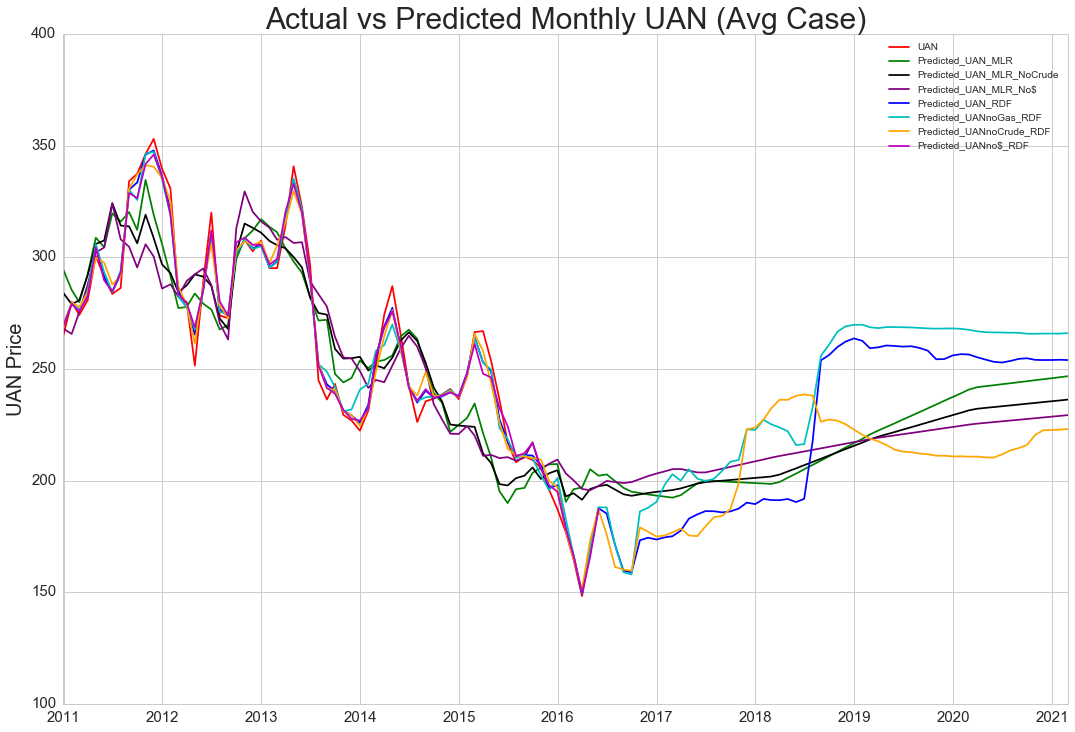

In [254]:
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'])
y1 = (df['UAN'])
y2 = (df['Predicted_UAN_MLR'])
y3 = (df['Predicted_UAN_MLR_NoCrude'])
y4 = (df['Predicted_UAN_MLR_No$'])
y5 = (df['Predicted_UAN_RDF'])
y6 = (df['Predicted_UANnoGas_RDF'])
y7 = (df['Predicted_UANnoCrude_RDF'])
y8 = (df['Predicted_UANno$_RDF'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'g')
ax.plot(x,y3,'k')
ax.plot(x,y4,'purple')
ax.plot(x,y5,'b')
ax.plot(x,y6,'c')
ax.plot(x,y7,'orange')
ax.plot(x,y8,'m')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN Price',size=(20))

plt.show()

## Best Case
[Top](#table-of-contents)

In [255]:
#predictions part
data2 = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdatebest2.csv")
newpred = data2[['Date','Dollar','Crude','Corn','Gas']][1062:]
newpred2 = data2[['Dollar','Crude','Corn','Gas']][1062:]
newpred3 = data2[['Dollar','Crude','Corn']][1062:]
newpred4 = data2[['Dollar','Corn','Gas']][1062:]
newpred5 = data2[['Crude','Corn','Gas']][1062:] 

In [256]:
#new predictions starting with rdf all
X = mar12onnew[['Dollar','Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','Gas']
newpred_predicted = forest.predict(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred['Predicted_UAN_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 27.573, test: 147.019
R^2 train: 0.989, test: 0.935
[ 0.1874072   0.08977087  0.64615319  0.07666874]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF
0,2016-04-01,95.5629,42.1429,378.5,2.05512,185.844666
1,2016-04-02,95.541,42.2857,378.85,2.05624,185.858951
2,2016-04-03,95.5192,42.4286,379.2,2.05736,185.818951
3,2016-04-04,95.4974,42.5714,379.55,2.05848,185.818951
4,2016-04-05,95.4756,42.7143,379.9,2.0596,185.818951
5,2016-04-06,95.4538,42.8571,380.25,2.06073,185.881332
6,2016-04-07,95.432,43,380.6,2.06185,185.927047
7,2016-04-08,95.4102,43.1429,380.95,2.06297,185.927047
8,2016-04-09,95.3884,43.2857,381.3,2.06409,186.189951
9,2016-04-10,95.3666,43.4286,381.65,2.06521,186.378523


In [257]:
#rdf no gas
X = mar12onnew[['Dollar','Crude','Corn']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred = pd.DataFrame(newpred_predicted2)
newpred['Predicted_UANnoGas_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 46.036, test: 238.678
R^2 train: 0.981, test: 0.894
[ 0.19822913  0.13708378  0.66468709]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF
0,2016-04-01,95.5629,42.1429,378.5,2.05512,185.844666,199.432805
1,2016-04-02,95.541,42.2857,378.85,2.05624,185.858951,199.520805
2,2016-04-03,95.5192,42.4286,379.2,2.05736,185.818951,199.520805
3,2016-04-04,95.4974,42.5714,379.55,2.05848,185.818951,199.208805
4,2016-04-05,95.4756,42.7143,379.9,2.0596,185.818951,199.228868
5,2016-04-06,95.4538,42.8571,380.25,2.06073,185.881332,199.539824
6,2016-04-07,95.432,43,380.6,2.06185,185.927047,199.473157
7,2016-04-08,95.4102,43.1429,380.95,2.06297,185.927047,199.793157
8,2016-04-09,95.3884,43.2857,381.3,2.06409,186.189951,199.657157
9,2016-04-10,95.3666,43.4286,381.65,2.06521,186.378523,199.657290


In [258]:
#rdf no crude
X = mar12onnew[['Dollar','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred = pd.DataFrame(newpred_predicted3)
newpred['Predicted_UANnoCrude_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 44.070, test: 164.806
R^2 train: 0.982, test: 0.927
[ 0.21824467  0.66737212  0.11438321]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF
0,2016-04-01,95.5629,42.1429,378.5,2.05512,185.844666,199.432805,180.726495
1,2016-04-02,95.541,42.2857,378.85,2.05624,185.858951,199.520805,180.783638
2,2016-04-03,95.5192,42.4286,379.2,2.05736,185.818951,199.520805,181.368400
3,2016-04-04,95.4974,42.5714,379.55,2.05848,185.818951,199.208805,181.174114
4,2016-04-05,95.4756,42.7143,379.9,2.0596,185.818951,199.228868,181.356971
5,2016-04-06,95.4538,42.8571,380.25,2.06073,185.881332,199.539824,181.402685
6,2016-04-07,95.432,43,380.6,2.06185,185.927047,199.473157,181.391257
7,2016-04-08,95.4102,43.1429,380.95,2.06297,185.927047,199.793157,183.015406
8,2016-04-09,95.3884,43.2857,381.3,2.06409,186.189951,199.657157,183.157549
9,2016-04-10,95.3666,43.4286,381.65,2.06521,186.378523,199.657290,183.357549


In [259]:
#rdf no dollar
X = mar12onnew[['Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted4 = forest.predict(newpred5)
df_new_pred = pd.DataFrame(newpred_predicted4)
newpred['Predicted_UANnoCrude_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 39.551, test: 189.413
R^2 train: 0.984, test: 0.916
[ 0.22173762  0.66827804  0.10998434]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF
0,2016-04-01,95.5629,42.1429,378.5,2.05512,185.844666,199.432805,179.845390
1,2016-04-02,95.541,42.2857,378.85,2.05624,185.858951,199.520805,179.845390
2,2016-04-03,95.5192,42.4286,379.2,2.05736,185.818951,199.520805,179.696818
3,2016-04-04,95.4974,42.5714,379.55,2.05848,185.818951,199.208805,179.728582
4,2016-04-05,95.4756,42.7143,379.9,2.0596,185.818951,199.228868,179.850487
5,2016-04-06,95.4538,42.8571,380.25,2.06073,185.881332,199.539824,179.806042
6,2016-04-07,95.432,43,380.6,2.06185,185.927047,199.473157,179.939029
7,2016-04-08,95.4102,43.1429,380.95,2.06297,185.927047,199.793157,179.936519
8,2016-04-09,95.3884,43.2857,381.3,2.06409,186.189951,199.657157,180.107947
9,2016-04-10,95.3666,43.4286,381.65,2.06521,186.378523,199.657290,180.009716


In [260]:
#adding mlr models
mlr_predicted = 593.8424 - (newpred['Dollar']*4.5351) - (newpred['Crude']*0.7806) + (newpred['Corn']*0.1819) + (newpred['Gas']*4.9062)  
newpred['Predicted_UAN_MLR'] = mlr_predicted

mlr_predicted_nocrude = 366.9225 - (newpred['Dollar']*2.4738) + (newpred['Corn']*0.1849) + (newpred['Gas']*0.6906)  
newpred['Predicted_UAN_MLR_NoCrude'] = mlr_predicted_nocrude

mlr_predicted_nodollar = 89.0179 + (newpred['Crude']*0.4263) + (newpred['Corn']*0.2391) + (newpred['Gas']*2.4394)  
newpred['Predicted_UAN_MLR_No$'] = mlr_predicted_nodollar

newpred

,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$
0,2016-04-01,95.5629,42.1429,378.5,2.05512,185.844666,199.432805,179.845390,206.491,201.923,202.496
1,2016-04-02,95.541,42.2857,378.85,2.05624,185.858951,199.520805,179.845390,206.547,202.042,202.643
2,2016-04-03,95.5192,42.4286,379.2,2.05736,185.818951,199.520805,179.696818,206.604,202.162,202.791
3,2016-04-04,95.4974,42.5714,379.55,2.05848,185.818951,199.208805,179.728582,206.66,202.281,202.938
4,2016-04-05,95.4756,42.7143,379.9,2.0596,185.818951,199.228868,179.850487,206.717,202.401,203.085
5,2016-04-06,95.4538,42.8571,380.25,2.06073,185.881332,199.539824,179.806042,206.773,202.52,203.233
6,2016-04-07,95.432,43,380.6,2.06185,185.927047,199.473157,179.939029,206.83,202.64,203.38
7,2016-04-08,95.4102,43.1429,380.95,2.06297,185.927047,199.793157,179.936519,206.886,202.759,203.527
8,2016-04-09,95.3884,43.2857,381.3,2.06409,186.189951,199.657157,180.107947,206.943,202.879,203.675
9,2016-04-10,95.3666,43.4286,381.65,2.06521,186.378523,199.657290,180.009716,207,202.998,203.822


In [261]:
frames = [mar12onnew,newpred]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Dollar,Gas,MLR_Error,MLR_Error_No$,MLR_Error_NoCrude,Predicted_UAN_MLR,Predicted_UAN_MLR_No$,Predicted_UAN_MLR_NoCrude,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF,RDF_Error,RDF_no$_Error,RDF_noCrude_Error,RDF_noGas_Error,UAN
0,575,81.93,2010-10-15,77.041,2.149,13.7058,2.56517,9.28464,295.635,266.669,284.14,261.737883,261.603979,261.584939,261.650389,0.668417,0.616915,0.609592,0.634765,260
1,569.25,83.8,2010-10-18,76.934,2.138,12.908,2.33267,8.97461,293.561,266.065,283.334,263.675026,265.352934,261.167796,263.507054,1.41347,2.05882,0.449152,1.34887,260
2,558,80.16,2010-10-19,78.184,2.089,10.941,0.655313,6.97222,288.446,261.704,278.128,265.953023,266.360666,268.245086,267.618696,2.28962,2.44641,3.17119,2.93027,260
3,585.5,82.54,2010-10-20,77.171,2.155,12.741,2.45424,8.65554,296.509,269.455,285.764,267.208473,268.334272,265.016159,265.978175,1.60018,2.02824,0.7666,1.13239,263
4,575.75,81.33,2010-10-21,77.418,2.133,11.9588,1.35131,7.73197,294.452,266.554,283.335,264.062327,263.138264,264.273510,263.282089,0.403926,0.052572,0.484224,0.107258,263
5,572.25,82.45,2010-10-22,77.472,2.133,11.2912,1.21466,7.43511,292.696,266.195,282.554,265.718586,264.630599,264.372082,265.432665,1.03368,0.62,0.521704,0.924968,263
6,581.5,83.21,2010-10-25,77.103,2.161,12.3939,2.20476,8.43986,295.596,268.799,285.197,264.271855,268.477434,263.143143,265.100441,0.483595,2.08267,0.0544269,0.798647,263
7,584,83.2,2010-10-26,77.708,2.169,11.5415,2.43784,8.04865,293.354,269.412,284.168,268.133239,267.005255,267.236398,268.745322,1.9518,1.52291,1.6108,2.18453,263
8,590.25,82.67,2010-10-27,78.149,2.193,9.33673,1.02183,6.06314,293.022,270.739,284.249,282.131872,277.937719,291.102977,286.037332,5.27309,3.7081,8.62051,6.73035,268
9,592,82.94,2010-10-28,77.308,2.22,8.42208,0.971573,4.62478,297.076,271.338,286.672,276.577630,275.912045,277.467992,276.346275,0.940741,0.697827,1.26569,0.856305,274


In [262]:
combined.to_csv("C:/Users/msteinme/Documents/UANbestmarch2.csv")

In [263]:
combined = combined[['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
combined

,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF
0,2010-10-15 00:00:00,77.041,81.93,575,2.149,260,295.635,284.14,266.669,261.738,261.604,261.585,261.65
1,2010-10-18 00:00:00,76.934,83.8,569.25,2.138,260,293.561,283.334,266.065,263.675,265.353,261.168,263.507
2,2010-10-19 00:00:00,78.184,80.16,558,2.089,260,288.446,278.128,261.704,265.953,266.361,268.245,267.619
3,2010-10-20 00:00:00,77.171,82.54,585.5,2.155,263,296.509,285.764,269.455,267.208,268.334,265.016,265.978
4,2010-10-21 00:00:00,77.418,81.33,575.75,2.133,263,294.452,283.335,266.554,264.062,263.138,264.274,263.282
5,2010-10-22 00:00:00,77.472,82.45,572.25,2.133,263,292.696,282.554,266.195,265.719,264.631,264.372,265.433
6,2010-10-25 00:00:00,77.103,83.21,581.5,2.161,263,295.596,285.197,268.799,264.272,268.477,263.143,265.1
7,2010-10-26 00:00:00,77.708,83.2,584,2.169,263,293.354,284.168,269.412,268.133,267.005,267.236,268.745
8,2010-10-27 00:00:00,78.149,82.67,590.25,2.193,268,293.022,284.249,270.739,282.132,277.938,291.103,286.037
9,2010-10-28 00:00:00,77.308,82.94,592,2.22,274,297.076,286.672,271.338,276.578,275.912,277.468,276.346


In [264]:
#split into monthly and making two months ahead so Mar->May
cols = ['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
dec_10 = combined[cols][0:11]
jan_11 = combined[cols][11:33]
feb_11 = combined[cols][33:56]
mar_11 = combined[cols][56:77]
apr_11 = combined[cols][77:97]
may_11 = combined[cols][97:120]
jun_11 = combined[cols][120:141]
jul_11 = combined[cols][141:163]
aug_11 = combined[cols][163:185]
sep_11 = combined[cols][185:206]
oct_11 = combined[cols][206:229]
nov_11 = combined[cols][229:251]
dec_11 = combined[cols][251:272]
jan_12 = combined[cols][272:294]
feb_12 = combined[cols][294:316]
mar_12 = combined[cols][316:338]
apr_12 = combined[cols][338:359]
may_12 = combined[cols][359:381]
jun_12 = combined[cols][381:401]
jul_12 = combined[cols][401:424]
aug_12 = combined[cols][424:445]
sep_12 = combined[cols][445:467]
oct_12 = combined[cols][467:490]
nov_12 = combined[cols][490:510]
dec_12 = combined[cols][510:533]
jan_13 = combined[cols][533:553]
feb_13 = combined[cols][553:571]
mar_13 = combined[cols][571:591]
apr_13 = combined[cols][591:610]
may_13 = combined[cols][610:630]
jun_13 = combined[cols][630:651]
jul_13 = combined[cols][651:672]
aug_13 = combined[cols][672:692]
sep_13 = combined[cols][692:714]
oct_13 = combined[cols][714:735]
nov_13 = combined[cols][735:755]
dec_13 = combined[cols][755:778]
jan_14 = combined[cols][778:797]
feb_14 = combined[cols][797:816]
mar_14 = combined[cols][816:838]
apr_14 = combined[cols][838:859]
may_14 = combined[cols][859:879]
jun_14 = combined[cols][879:901]
jul_14 = combined[cols][901:922]
aug_14 = combined[cols][922:943]
sep_14 = combined[cols][943:966]
oct_14 = combined[cols][966:987]
nov_14 = combined[cols][987:1009]
dec_14 = combined[cols][1009:1032]
jan_15 = combined[cols][1032:1050]
feb_15 = combined[cols][1050:1066]
mar_15 = combined[cols][1066:1085]
apr_15 = combined[cols][1085:1103]
may_15 = combined[cols][1103:1121]
jun_15 = combined[cols][1121:1140]
jul_15 = combined[cols][1140:1159]
aug_15 = combined[cols][1159:1179]
sep_15 = combined[cols][1179:1201]
oct_15 = combined[cols][1201:1219]
nov_15 = combined[cols][1219:1240]
dec_15 = combined[cols][1240:1262]
jan_16 = combined[cols][1262:1281]
feb_16 = combined[cols][1281:1303]
mar_16 = combined[cols][1303:1323]
apr_16 = combined[cols][1323:1344]
may_16 = combined[cols][1344:1366]
jun_16 = combined[cols][1366:1396]
jul_16 = combined[cols][1396:1427]
aug_16 = combined[cols][1427:1457]
sep_16 = combined[cols][1457:1488]
oct_16 = combined[cols][1488:1519]
nov_16 = combined[cols][1519:1549]
dec_16 = combined[cols][1549:1580]
jan_17 = combined[cols][1580:1610]
feb_17 = combined[cols][1610:1641]
mar_17 = combined[cols][1641:1672]
apr_17 = combined[cols][1672:1700]
may_17 = combined[cols][1700:1731]
jun_17 = combined[cols][1731:1761]
jul_17 = combined[cols][1761:1792]
aug_17 = combined[cols][1792:1822]
sep_17 = combined[cols][1822:1853]
oct_17 = combined[cols][1853:1884]
nov_17 = combined[cols][1884:1914]
dec_17 = combined[cols][1914:1945]
jan_18 = combined[cols][1945:1975]
feb_18 = combined[cols][1975:2006]
mar_18 = combined[cols][2006:2037]
apr_18 = combined[cols][2037:2065]
may_18 = combined[cols][2065:2096]
jun_18 = combined[cols][2096:2126]
jul_18 = combined[cols][2126:2157]
aug_18 = combined[cols][2157:2187]
sep_18 = combined[cols][2187:2218]
oct_18 = combined[cols][2218:2249]
nov_18 = combined[cols][2249:2279]
dec_18 = combined[cols][2279:2310]
jan_19 = combined[cols][2310:2340]
feb_19 = combined[cols][2340:2371]
mar_19 = combined[cols][2371:2402]
apr_19 = combined[cols][2402:2430]
may_19 = combined[cols][2430:2461]
jun_19 = combined[cols][2461:2491]
jul_19 = combined[cols][2491:2522]
aug_19 = combined[cols][2522:2552]
sep_19 = combined[cols][2552:2583]
oct_19 = combined[cols][2583:2614]
nov_19 = combined[cols][2614:2644]
dec_19 = combined[cols][2644:2675]
jan_20 = combined[cols][2675:2705]
feb_20 = combined[cols][2705:2736]
mar_20 = combined[cols][2736:2767]
apr_20 = combined[cols][2767:2796]
may_20 = combined[cols][2796:2827]
jun_20 = combined[cols][2827:2857]
jul_20 = combined[cols][2857:2888]
aug_20 = combined[cols][2888:2918]
sep_20 = combined[cols][2918:2949]
oct_20 = combined[cols][2949:2980]
nov_20 = combined[cols][2980:3010]
dec_20 = combined[cols][3010:3041]
jan_21 = combined[cols][3041:3071]
feb_21 = combined[cols][3071:3103]

In [265]:
mycolumns = ['Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
df = pd.DataFrame(columns=mycolumns)
rows = [dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean(),
        jan_21[mycolumns].mean(),feb_21[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF
118,85.713151,70.936986,500,3.846427,NaN,259.572621,249.991651,248.191312,256.806272,NaN,255.525892,263.970763
119,85.554384,71.062329,500,3.880617,NaN,260.362544,250.408020,248.328148,256.489119,NaN,255.514829,263.970763
120,85.395616,71.187671,500,3.914806,NaN,261.152467,250.824389,248.464983,256.100888,NaN,255.424164,263.970763
121,85.236849,71.313014,500,3.948996,NaN,261.942390,251.240759,248.601819,256.326786,NaN,255.309240,263.970763
122,85.078082,71.438356,500,3.983185,NaN,262.732313,251.657128,248.738654,256.048088,NaN,252.102970,263.970763


In [266]:
#creating monthly dates in datetime form from 12/2010 to 2/2021
from datetime import datetime
rng2 = pd.date_range(start='2010-12-01', periods=123, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [267]:
print(df.dtypes)
df

Dollar                              float64
Crude                               float64
Corn                                float64
Gas                                 float64
UAN                                 float64
Predicted_UAN_MLR                   float64
Predicted_UAN_MLR_NoCrude           float64
Predicted_UAN_MLR_No$               float64
Predicted_UAN_RDF                   float64
Predicted_UANno$_RDF                float64
Predicted_UANnoCrude_RDF            float64
Predicted_UANnoGas_RDF              float64
Monthly_Date                 datetime64[ns]
dtype: object


,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF,Monthly_Date
0,77.432182,82.398182,579.863636,2.162000,265.000000,294.444091,284.080632,268.063623,269.208283,269.307281,269.641423,269.821579,2010-12-31
1,78.436909,84.865909,565.681818,2.163409,280.045455,285.388485,278.973893,265.728180,279.057232,279.266149,279.773649,279.442832,2011-01-31
2,80.068174,89.946522,597.423913,2.192435,274.217391,279.940903,280.827628,275.554385,276.319682,275.839893,277.772043,276.383475,2011-02-28
3,79.155381,91.040000,645.214286,2.313524,280.809524,292.514097,292.005760,287.742598,283.463140,282.454537,284.070296,284.944085,2011-03-31
4,77.777600,92.335000,701.937500,2.462300,300.650000,308.799473,306.004981,302.220101,304.539468,304.535898,299.818118,305.857767,2011-04-30
5,76.288739,103.903478,690.304348,2.493783,291.130435,304.559641,307.558897,304.447056,291.345759,289.692449,297.622305,293.398196,2011-05-31
6,74.700571,110.682381,758.928571,2.652238,283.619048,319.730690,324.285755,324.131490,284.550973,284.717630,287.838503,284.410116,2011-06-30
7,74.943091,101.849091,708.170455,2.598955,286.318182,316.031785,314.263837,308.099613,292.517757,293.140066,291.682554,294.153316,2011-07-31
8,74.694636,96.824545,702.704545,2.645636,334.136364,320.315492,313.900055,304.764626,330.340931,328.885219,330.788780,330.272397,2011-08-31
9,74.734000,97.650476,662.035714,2.691190,337.476190,312.318090,306.314471,295.503927,333.583992,326.552214,337.113414,325.746422,2011-09-30


In [ ]:
#df.to_csv("C:/Users/msteinme/Documents/UANbestmarch3.csv")

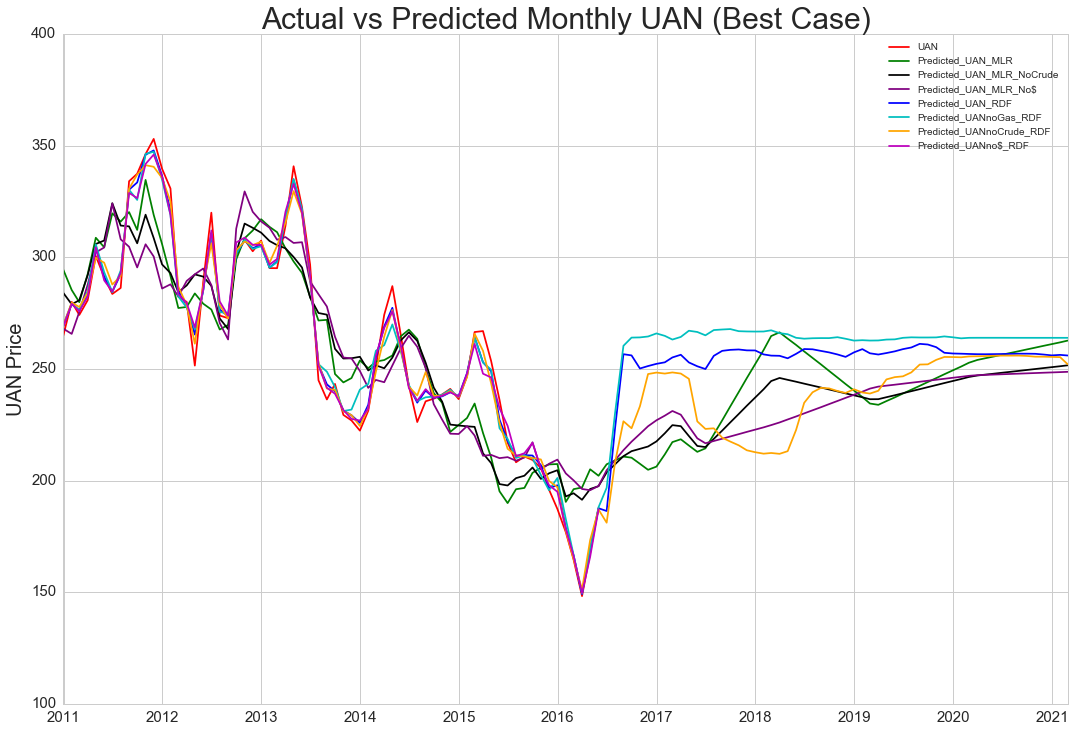

In [268]:
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'])
y1 = (df['UAN'])
y2 = (df['Predicted_UAN_MLR'])
y3 = (df['Predicted_UAN_MLR_NoCrude'])
y4 = (df['Predicted_UAN_MLR_No$'])
y5 = (df['Predicted_UAN_RDF'])
y6 = (df['Predicted_UANnoGas_RDF'])
y7 = (df['Predicted_UANnoCrude_RDF'])
y8 = (df['Predicted_UANno$_RDF'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'g')
ax.plot(x,y3,'k')
ax.plot(x,y4,'purple')
ax.plot(x,y5,'b')
ax.plot(x,y6,'c')
ax.plot(x,y7,'orange')
ax.plot(x,y8,'m')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN Price',size=(20))

plt.show()

## Worst Case
[Top](#table-of-contents)

In [269]:
#predictions part
data2 = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdateworst2.csv")
newpred = data2[['Date','Dollar','Crude','Corn','Gas']][1062:]
newpred2 = data2[['Dollar','Crude','Corn','Gas']][1062:]
newpred3 = data2[['Dollar','Crude','Corn']][1062:]
newpred4 = data2[['Dollar','Corn','Gas']][1062:]
newpred5 = data2[['Crude','Corn','Gas']][1062:] 

In [270]:
#new predictions starting with rdf all
X = mar12onnew[['Dollar','Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','Gas']
newpred_predicted = forest.predict(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred['Predicted_UAN_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 28.422, test: 151.887
R^2 train: 0.988, test: 0.933
[ 0.18402879  0.0910778   0.64503226  0.07986116]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF
0,2016-04-01,97.2057,38.3,368.857,2.05397,179.513739
1,2016-04-02,97.2934,38.2,368.564,2.05394,175.245000
2,2016-04-03,97.3811,38.1,368.271,2.05391,174.363095
3,2016-04-04,97.4689,37.9,367.979,2.05388,169.315190
4,2016-04-05,97.5566,37.8,367.686,2.05384,167.960905
5,2016-04-06,97.6443,37.7,367.393,2.05381,168.115190
6,2016-04-07,97.732,37.6,367.1,2.05378,167.869476
7,2016-04-08,97.8197,37.5,366.807,2.05375,166.951762
8,2016-04-09,97.9074,37.4,366.514,2.05372,165.614619
9,2016-04-10,97.9951,37.3,366.221,2.05369,164.254857


In [271]:
#rdf no gas
X = mar12onnew[['Dollar','Crude','Corn']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted2 = forest.predict(newpred3)
df_new_pred = pd.DataFrame(newpred_predicted2)
newpred['Predicted_UANnoGas_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 43.400, test: 239.383
R^2 train: 0.982, test: 0.894
[ 0.19823168  0.13609057  0.66567775]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF
0,2016-04-01,97.2057,38.3,368.857,2.05397,179.513739,182.585917
1,2016-04-02,97.2934,38.2,368.564,2.05394,175.245000,176.760984
2,2016-04-03,97.3811,38.1,368.271,2.05391,174.363095,175.257429
3,2016-04-04,97.4689,37.9,367.979,2.05388,169.315190,168.875333
4,2016-04-05,97.5566,37.8,367.686,2.05384,167.960905,165.518000
5,2016-04-06,97.6443,37.7,367.393,2.05381,168.115190,164.671333
6,2016-04-07,97.732,37.6,367.1,2.05378,167.869476,162.542267
7,2016-04-08,97.8197,37.5,366.807,2.05375,166.951762,161.302267
8,2016-04-09,97.9074,37.4,366.514,2.05372,165.614619,161.246267
9,2016-04-10,97.9951,37.3,366.221,2.05369,164.254857,161.342267


In [272]:
#rdf no crude
X = mar12onnew[['Dollar','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred = pd.DataFrame(newpred_predicted3)
newpred['Predicted_UANnoCrude_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 41.869, test: 163.432
R^2 train: 0.983, test: 0.928
[ 0.21657745  0.67146249  0.11196006]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF
0,2016-04-01,97.2057,38.3,368.857,2.05397,179.513739,182.585917,174.588117
1,2016-04-02,97.2934,38.2,368.564,2.05394,175.245000,176.760984,173.690688
2,2016-04-03,97.3811,38.1,368.271,2.05391,174.363095,175.257429,173.216402
3,2016-04-04,97.4689,37.9,367.979,2.05388,169.315190,168.875333,170.366062
4,2016-04-05,97.5566,37.8,367.686,2.05384,167.960905,165.518000,167.223681
5,2016-04-06,97.6443,37.7,367.393,2.05381,168.115190,164.671333,167.340811
6,2016-04-07,97.732,37.6,367.1,2.05378,167.869476,162.542267,167.351096
7,2016-04-08,97.8197,37.5,366.807,2.05375,166.951762,161.302267,166.324620
8,2016-04-09,97.9074,37.4,366.514,2.05372,165.614619,161.246267,161.456305
9,2016-04-10,97.9951,37.3,366.221,2.05369,164.254857,161.342267,160.197597


In [273]:
#rdf no dollar
X = mar12onnew[['Crude','Corn','Gas']].values
y = mar12onnew['UAN'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted4 = forest.predict(newpred5)
df_new_pred = pd.DataFrame(newpred_predicted4)
newpred['Predicted_UANnoCrude_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 39.576, test: 197.494
R^2 train: 0.984, test: 0.913
[ 0.22187888  0.66900288  0.10911823]


,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF
0,2016-04-01,97.2057,38.3,368.857,2.05397,179.513739,182.585917,171.033293
1,2016-04-02,97.2934,38.2,368.564,2.05394,175.245000,176.760984,170.508571
2,2016-04-03,97.3811,38.1,368.271,2.05391,174.363095,175.257429,170.375238
3,2016-04-04,97.4689,37.9,367.979,2.05388,169.315190,168.875333,169.769048
4,2016-04-05,97.5566,37.8,367.686,2.05384,167.960905,165.518000,169.740476
5,2016-04-06,97.6443,37.7,367.393,2.05381,168.115190,164.671333,169.786190
6,2016-04-07,97.732,37.6,367.1,2.05378,167.869476,162.542267,169.694762
7,2016-04-08,97.8197,37.5,366.807,2.05375,166.951762,161.302267,169.694762
8,2016-04-09,97.9074,37.4,366.514,2.05372,165.614619,161.246267,169.661905
9,2016-04-10,97.9951,37.3,366.221,2.05369,164.254857,161.342267,169.633333


In [274]:
#adding mlr models
mlr_predicted = 593.8424 - (newpred['Dollar']*4.5351) - (newpred['Crude']*0.7806) + (newpred['Corn']*0.1819) + (newpred['Gas']*4.9062)  
newpred['Predicted_UAN_MLR'] = mlr_predicted

mlr_predicted_nocrude = 366.9225 - (newpred['Dollar']*2.4738) + (newpred['Corn']*0.1849) + (newpred['Gas']*0.6906)  
newpred['Predicted_UAN_MLR_NoCrude'] = mlr_predicted_nocrude

mlr_predicted_nodollar = 89.0179 + (newpred['Crude']*0.4263) + (newpred['Corn']*0.2391) + (newpred['Gas']*2.4394)  
newpred['Predicted_UAN_MLR_No$'] = mlr_predicted_nodollar

newpred

,Date,Dollar,Crude,Corn,Gas,Predicted_UAN_RDF,Predicted_UANnoGas_RDF,Predicted_UANnoCrude_RDF,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$
0,2016-04-01,97.2057,38.3,368.857,2.05397,179.513739,182.585917,171.033293,200.28,196.075,198.549
1,2016-04-02,97.2934,38.2,368.564,2.05394,175.245000,176.760984,170.508571,199.907,195.804,198.437
2,2016-04-03,97.3811,38.1,368.271,2.05391,174.363095,175.257429,170.375238,199.534,195.533,198.324
3,2016-04-04,97.4689,37.9,367.979,2.05388,169.315190,168.875333,169.769048,199.239,195.262,198.169
4,2016-04-05,97.5566,37.8,367.686,2.05384,167.960905,165.518000,169.740476,198.866,194.991,198.056
5,2016-04-06,97.6443,37.7,367.393,2.05381,168.115190,164.671333,169.786190,198.492,194.719,197.943
6,2016-04-07,97.732,37.6,367.1,2.05378,167.869476,162.542267,169.694762,198.119,194.448,197.83
7,2016-04-08,97.8197,37.5,366.807,2.05375,166.951762,161.302267,169.694762,197.746,194.177,197.718
8,2016-04-09,97.9074,37.4,366.514,2.05372,165.614619,161.246267,169.661905,197.373,193.906,197.605
9,2016-04-10,97.9951,37.3,366.221,2.05369,164.254857,161.342267,169.633333,197,193.635,197.492


In [275]:
frames = [mar12onnew,newpred]
combined = pd.concat(frames)
combined

,Corn,Crude,Date,Dollar,Gas,MLR_Error,MLR_Error_No$,MLR_Error_NoCrude,Predicted_UAN_MLR,Predicted_UAN_MLR_No$,Predicted_UAN_MLR_NoCrude,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF,RDF_Error,RDF_no$_Error,RDF_noCrude_Error,RDF_noGas_Error,UAN
0,575,81.93,2010-10-15,77.041,2.149,13.7058,2.56517,9.28464,295.635,266.669,284.14,261.737883,261.603979,261.584939,261.650389,0.668417,0.616915,0.609592,0.634765,260
1,569.25,83.8,2010-10-18,76.934,2.138,12.908,2.33267,8.97461,293.561,266.065,283.334,263.675026,265.352934,261.167796,263.507054,1.41347,2.05882,0.449152,1.34887,260
2,558,80.16,2010-10-19,78.184,2.089,10.941,0.655313,6.97222,288.446,261.704,278.128,265.953023,266.360666,268.245086,267.618696,2.28962,2.44641,3.17119,2.93027,260
3,585.5,82.54,2010-10-20,77.171,2.155,12.741,2.45424,8.65554,296.509,269.455,285.764,267.208473,268.334272,265.016159,265.978175,1.60018,2.02824,0.7666,1.13239,263
4,575.75,81.33,2010-10-21,77.418,2.133,11.9588,1.35131,7.73197,294.452,266.554,283.335,264.062327,263.138264,264.273510,263.282089,0.403926,0.052572,0.484224,0.107258,263
5,572.25,82.45,2010-10-22,77.472,2.133,11.2912,1.21466,7.43511,292.696,266.195,282.554,265.718586,264.630599,264.372082,265.432665,1.03368,0.62,0.521704,0.924968,263
6,581.5,83.21,2010-10-25,77.103,2.161,12.3939,2.20476,8.43986,295.596,268.799,285.197,264.271855,268.477434,263.143143,265.100441,0.483595,2.08267,0.0544269,0.798647,263
7,584,83.2,2010-10-26,77.708,2.169,11.5415,2.43784,8.04865,293.354,269.412,284.168,268.133239,267.005255,267.236398,268.745322,1.9518,1.52291,1.6108,2.18453,263
8,590.25,82.67,2010-10-27,78.149,2.193,9.33673,1.02183,6.06314,293.022,270.739,284.249,282.131872,277.937719,291.102977,286.037332,5.27309,3.7081,8.62051,6.73035,268
9,592,82.94,2010-10-28,77.308,2.22,8.42208,0.971573,4.62478,297.076,271.338,286.672,276.577630,275.912045,277.467992,276.346275,0.940741,0.697827,1.26569,0.856305,274


In [276]:
combined.to_csv("C:/Users/msteinme/Documents/UANworstmarch2.csv")

In [277]:
combined = combined[['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
combined

,Date,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF
0,2010-10-15 00:00:00,77.041,81.93,575,2.149,260,295.635,284.14,266.669,261.738,261.604,261.585,261.65
1,2010-10-18 00:00:00,76.934,83.8,569.25,2.138,260,293.561,283.334,266.065,263.675,265.353,261.168,263.507
2,2010-10-19 00:00:00,78.184,80.16,558,2.089,260,288.446,278.128,261.704,265.953,266.361,268.245,267.619
3,2010-10-20 00:00:00,77.171,82.54,585.5,2.155,263,296.509,285.764,269.455,267.208,268.334,265.016,265.978
4,2010-10-21 00:00:00,77.418,81.33,575.75,2.133,263,294.452,283.335,266.554,264.062,263.138,264.274,263.282
5,2010-10-22 00:00:00,77.472,82.45,572.25,2.133,263,292.696,282.554,266.195,265.719,264.631,264.372,265.433
6,2010-10-25 00:00:00,77.103,83.21,581.5,2.161,263,295.596,285.197,268.799,264.272,268.477,263.143,265.1
7,2010-10-26 00:00:00,77.708,83.2,584,2.169,263,293.354,284.168,269.412,268.133,267.005,267.236,268.745
8,2010-10-27 00:00:00,78.149,82.67,590.25,2.193,268,293.022,284.249,270.739,282.132,277.938,291.103,286.037
9,2010-10-28 00:00:00,77.308,82.94,592,2.22,274,297.076,286.672,271.338,276.578,275.912,277.468,276.346


In [278]:
#split into monthly and making two months ahead so Mar->May
cols = ['Date','Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
dec_10 = combined[cols][0:11]
jan_11 = combined[cols][11:33]
feb_11 = combined[cols][33:56]
mar_11 = combined[cols][56:77]
apr_11 = combined[cols][77:97]
may_11 = combined[cols][97:120]
jun_11 = combined[cols][120:141]
jul_11 = combined[cols][141:163]
aug_11 = combined[cols][163:185]
sep_11 = combined[cols][185:206]
oct_11 = combined[cols][206:229]
nov_11 = combined[cols][229:251]
dec_11 = combined[cols][251:272]
jan_12 = combined[cols][272:294]
feb_12 = combined[cols][294:316]
mar_12 = combined[cols][316:338]
apr_12 = combined[cols][338:359]
may_12 = combined[cols][359:381]
jun_12 = combined[cols][381:401]
jul_12 = combined[cols][401:424]
aug_12 = combined[cols][424:445]
sep_12 = combined[cols][445:467]
oct_12 = combined[cols][467:490]
nov_12 = combined[cols][490:510]
dec_12 = combined[cols][510:533]
jan_13 = combined[cols][533:553]
feb_13 = combined[cols][553:571]
mar_13 = combined[cols][571:591]
apr_13 = combined[cols][591:610]
may_13 = combined[cols][610:630]
jun_13 = combined[cols][630:651]
jul_13 = combined[cols][651:672]
aug_13 = combined[cols][672:692]
sep_13 = combined[cols][692:714]
oct_13 = combined[cols][714:735]
nov_13 = combined[cols][735:755]
dec_13 = combined[cols][755:778]
jan_14 = combined[cols][778:797]
feb_14 = combined[cols][797:816]
mar_14 = combined[cols][816:838]
apr_14 = combined[cols][838:859]
may_14 = combined[cols][859:879]
jun_14 = combined[cols][879:901]
jul_14 = combined[cols][901:922]
aug_14 = combined[cols][922:943]
sep_14 = combined[cols][943:966]
oct_14 = combined[cols][966:987]
nov_14 = combined[cols][987:1009]
dec_14 = combined[cols][1009:1032]
jan_15 = combined[cols][1032:1050]
feb_15 = combined[cols][1050:1066]
mar_15 = combined[cols][1066:1085]
apr_15 = combined[cols][1085:1103]
may_15 = combined[cols][1103:1121]
jun_15 = combined[cols][1121:1140]
jul_15 = combined[cols][1140:1159]
aug_15 = combined[cols][1159:1179]
sep_15 = combined[cols][1179:1201]
oct_15 = combined[cols][1201:1219]
nov_15 = combined[cols][1219:1240]
dec_15 = combined[cols][1240:1262]
jan_16 = combined[cols][1262:1281]
feb_16 = combined[cols][1281:1303]
mar_16 = combined[cols][1303:1323]
apr_16 = combined[cols][1323:1344]
may_16 = combined[cols][1344:1366]
jun_16 = combined[cols][1366:1396]
jul_16 = combined[cols][1396:1427]
aug_16 = combined[cols][1427:1457]
sep_16 = combined[cols][1457:1488]
oct_16 = combined[cols][1488:1519]
nov_16 = combined[cols][1519:1549]
dec_16 = combined[cols][1549:1580]
jan_17 = combined[cols][1580:1610]
feb_17 = combined[cols][1610:1641]
mar_17 = combined[cols][1641:1672]
apr_17 = combined[cols][1672:1700]
may_17 = combined[cols][1700:1731]
jun_17 = combined[cols][1731:1761]
jul_17 = combined[cols][1761:1792]
aug_17 = combined[cols][1792:1822]
sep_17 = combined[cols][1822:1853]
oct_17 = combined[cols][1853:1884]
nov_17 = combined[cols][1884:1914]
dec_17 = combined[cols][1914:1945]
jan_18 = combined[cols][1945:1975]
feb_18 = combined[cols][1975:2006]
mar_18 = combined[cols][2006:2037]
apr_18 = combined[cols][2037:2065]
may_18 = combined[cols][2065:2096]
jun_18 = combined[cols][2096:2126]
jul_18 = combined[cols][2126:2157]
aug_18 = combined[cols][2157:2187]
sep_18 = combined[cols][2187:2218]
oct_18 = combined[cols][2218:2249]
nov_18 = combined[cols][2249:2279]
dec_18 = combined[cols][2279:2310]
jan_19 = combined[cols][2310:2340]
feb_19 = combined[cols][2340:2371]
mar_19 = combined[cols][2371:2402]
apr_19 = combined[cols][2402:2430]
may_19 = combined[cols][2430:2461]
jun_19 = combined[cols][2461:2491]
jul_19 = combined[cols][2491:2522]
aug_19 = combined[cols][2522:2552]
sep_19 = combined[cols][2552:2583]
oct_19 = combined[cols][2583:2614]
nov_19 = combined[cols][2614:2644]
dec_19 = combined[cols][2644:2675]
jan_20 = combined[cols][2675:2705]
feb_20 = combined[cols][2705:2736]
mar_20 = combined[cols][2736:2767]
apr_20 = combined[cols][2767:2796]
may_20 = combined[cols][2796:2827]
jun_20 = combined[cols][2827:2857]
jul_20 = combined[cols][2857:2888]
aug_20 = combined[cols][2888:2918]
sep_20 = combined[cols][2918:2949]
oct_20 = combined[cols][2949:2980]
nov_20 = combined[cols][2980:3010]
dec_20 = combined[cols][3010:3041]
jan_21 = combined[cols][3041:3071]
feb_21 = combined[cols][3071:3103]

In [279]:
mycolumns = ['Dollar','Crude','Corn','Gas','UAN','Predicted_UAN_MLR','Predicted_UAN_MLR_NoCrude','Predicted_UAN_MLR_No$','Predicted_UAN_RDF','Predicted_UANno$_RDF','Predicted_UANnoCrude_RDF','Predicted_UANnoGas_RDF']
df = pd.DataFrame(columns=mycolumns)
rows = [dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean(),
        jan_21[mycolumns].mean(),feb_21[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail() 

,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF
118,91.201096,45.000000,407.739726,2.004262,NaN,229.110474,218.084447,210.581164,247.309777,NaN,184.389573,259.918013
119,90.933699,45.666667,410.246575,2.003313,NaN,230.254089,219.208796,211.462437,248.745731,NaN,184.475619,259.929175
120,90.666301,46.332258,412.753425,2.002364,NaN,231.398542,220.333145,212.343252,250.639616,NaN,187.778663,262.692695
121,90.398904,47.003333,415.260274,2.001415,NaN,232.538716,221.457493,213.226405,254.518347,NaN,190.803124,267.007469
122,90.131507,47.670968,417.767123,2.000467,NaN,233.681575,222.581842,214.108091,255.030005,NaN,191.183228,266.412444


In [280]:
#creating monthly dates in datetime form from 12/2010 to 2/2021
from datetime import datetime
rng2 = pd.date_range(start='2010-12-01', periods=123, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [281]:
print(df.dtypes)
df

Dollar                              float64
Crude                               float64
Corn                                float64
Gas                                 float64
UAN                                 float64
Predicted_UAN_MLR                   float64
Predicted_UAN_MLR_NoCrude           float64
Predicted_UAN_MLR_No$               float64
Predicted_UAN_RDF                   float64
Predicted_UANno$_RDF                float64
Predicted_UANnoCrude_RDF            float64
Predicted_UANnoGas_RDF              float64
Monthly_Date                 datetime64[ns]
dtype: object


,Dollar,Crude,Corn,Gas,UAN,Predicted_UAN_MLR,Predicted_UAN_MLR_NoCrude,Predicted_UAN_MLR_No$,Predicted_UAN_RDF,Predicted_UANno$_RDF,Predicted_UANnoCrude_RDF,Predicted_UANnoGas_RDF,Monthly_Date
0,77.432182,82.398182,579.863636,2.162000,265.000000,294.444091,284.080632,268.063623,269.208283,269.307281,269.641423,269.821579,2010-12-31
1,78.436909,84.865909,565.681818,2.163409,280.045455,285.388485,278.973893,265.728180,279.057232,279.266149,279.773649,279.442832,2011-01-31
2,80.068174,89.946522,597.423913,2.192435,274.217391,279.940903,280.827628,275.554385,276.319682,275.839893,277.772043,276.383475,2011-02-28
3,79.155381,91.040000,645.214286,2.313524,280.809524,292.514097,292.005760,287.742598,283.463140,282.454537,284.070296,284.944085,2011-03-31
4,77.777600,92.335000,701.937500,2.462300,300.650000,308.799473,306.004981,302.220101,304.539468,304.535898,299.818118,305.857767,2011-04-30
5,76.288739,103.903478,690.304348,2.493783,291.130435,304.559641,307.558897,304.447056,291.345759,289.692449,297.622305,293.398196,2011-05-31
6,74.700571,110.682381,758.928571,2.652238,283.619048,319.730690,324.285755,324.131490,284.550973,284.717630,287.838503,284.410116,2011-06-30
7,74.943091,101.849091,708.170455,2.598955,286.318182,316.031785,314.263837,308.099613,292.517757,293.140066,291.682554,294.153316,2011-07-31
8,74.694636,96.824545,702.704545,2.645636,334.136364,320.315492,313.900055,304.764626,330.340931,328.885219,330.788780,330.272397,2011-08-31
9,74.734000,97.650476,662.035714,2.691190,337.476190,312.318090,306.314471,295.503927,333.583992,326.552214,337.113414,325.746422,2011-09-30


In [ ]:
#df.to_csv("C:/Users/msteinme/Documents/UANworstmarch3.csv")

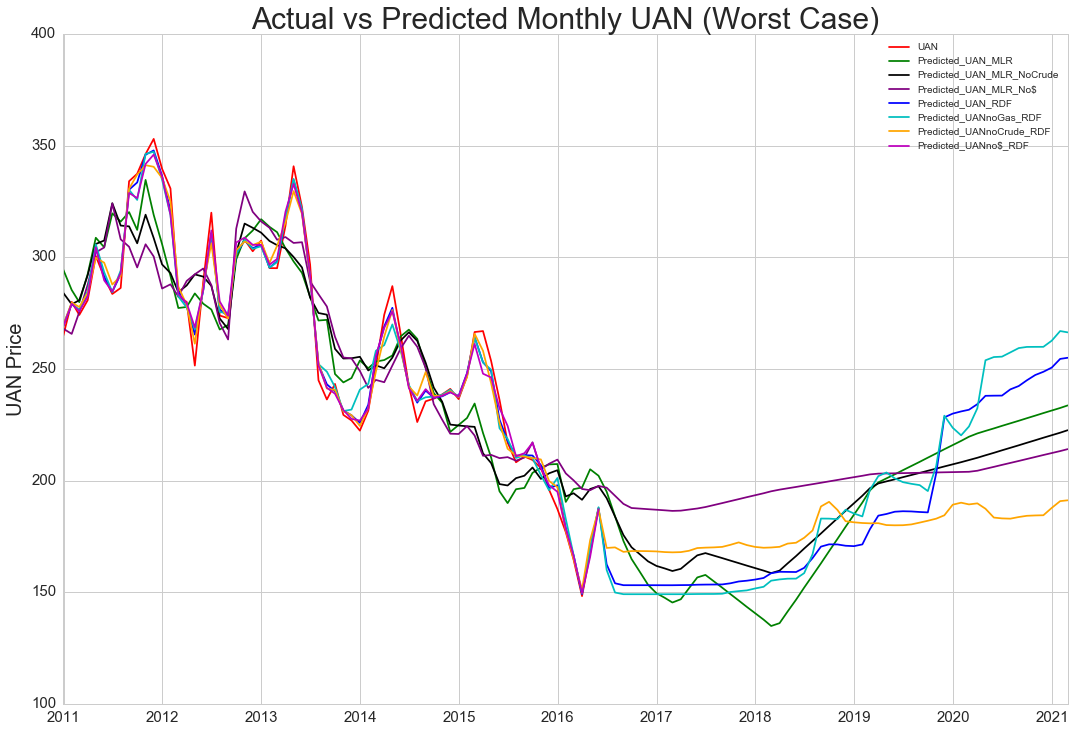

In [282]:
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'])
y1 = (df['UAN'])
y2 = (df['Predicted_UAN_MLR'])
y3 = (df['Predicted_UAN_MLR_NoCrude'])
y4 = (df['Predicted_UAN_MLR_No$'])
y5 = (df['Predicted_UAN_RDF'])
y6 = (df['Predicted_UANnoGas_RDF'])
y7 = (df['Predicted_UANnoCrude_RDF'])
y8 = (df['Predicted_UANno$_RDF'])

fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
ax.plot(x,y2,'g')
ax.plot(x,y3,'k')
ax.plot(x,y4,'purple')
ax.plot(x,y5,'b')
ax.plot(x,y6,'c')
ax.plot(x,y7,'orange')
ax.plot(x,y8,'m')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly UAN (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('UAN Price',size=(20))

plt.show()